In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
from settings import *
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from src.slice_pairwise_inter import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import squareform

plt.style.use('default')

# Data preparation and info #

In [2]:
#1NP
name_root_1NP_1Mb = "mesc_46C_1Mb_481x1"
path_1 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_1Mb + "/"
file_name_1 = "segregation_" + name_root_1NP_1Mb +  ".pkl"
with open(path_1 + file_name_1, 'rb') as f_1:
    segregation_table_1NP = pickle.load(f_1)

gw_coseg_matrix_1NP, gw_norm_link_disq_1NP = compute_coseg_nld_genomewide(segregation_table_1NP, 1, 19)


#3NP
name_root_3NP_1Mb = "iza-mesc_1Mb_420x3"
path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_3NP_1Mb + "/"
file_name_2 = "segregation_" + name_root_3NP_1Mb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f_2:
    segregation_table_3NP = pickle.load(f_2)

gw_coseg_matrix_3NP, gw_norm_link_disq_3NP = compute_coseg_nld_genomewide(segregation_table_3NP, 1, 19)



start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_1NP[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)

for i in range(gw_coseg_matrix_1NP.shape[0]):
    for j in range(gw_coseg_matrix_1NP.shape[1]):
        gw_coseg_matrix_1NP[j,i] = gw_coseg_matrix_1NP[i,j]
        gw_norm_link_disq_1NP[j,i] = gw_norm_link_disq_1NP[i, j]

        gw_coseg_matrix_3NP[j,i] = gw_coseg_matrix_3NP[i,j]
        gw_norm_link_disq_3NP[j,i] = gw_norm_link_disq_3NP[i, j] 



In [3]:
gw_coseg_matrix_1NP.shape

(2473, 2473)

In [4]:
print("Dimensioni del dataset: " , gw_coseg_matrix_1NP.shape)
print("Numero di nan nella coseg"  , np.argwhere(gw_coseg_matrix_1NP != gw_coseg_matrix_1NP).shape)
print("Numero di nan nella nld  "    , np.argwhere(gw_norm_link_disq_1NP != gw_norm_link_disq_1NP).shape)

print("Numero di zeri nella coseg "  , np.argwhere(gw_coseg_matrix_1NP == 0).shape)
print("Numero di zeri nella nld "  ,   np.argwhere(gw_norm_link_disq_1NP == 0).shape)

Dimensioni del dataset:  (2473, 2473)
Numero di nan nella coseg (2473, 2)
Numero di nan nella nld   (2473, 2)
Numero di zeri nella coseg  (1088934, 2)
Numero di zeri nella nld  (1088934, 2)


________________

# Viewpoint pairwise contact distribution #

this analysis for the moment is not used

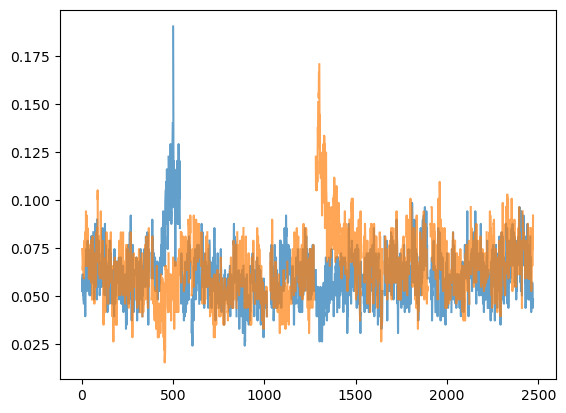

In [5]:
fig, ax = plt.subplots(1)

viewpoint_1 = 500
viewpoint_2 = 1300

y_1 = gw_coseg_matrix_1NP[viewpoint_1, :]
y_1[ np.where(gw_coseg_matrix_1NP[viewpoint_1, :] == 0)] = np.nan
ax.plot(np.arange(0, gw_coseg_matrix_1NP[viewpoint_1, :].shape[0],1) , y_1, alpha = 0.7);

y_2 = gw_coseg_matrix_1NP[viewpoint_2, :]
y_2[ np.where(gw_coseg_matrix_1NP[viewpoint_2, :] == 0)] = np.nan
ax.plot(np.arange(0, gw_coseg_matrix_1NP[viewpoint_2, :].shape[0],1) , y_2, alpha = 0.7);


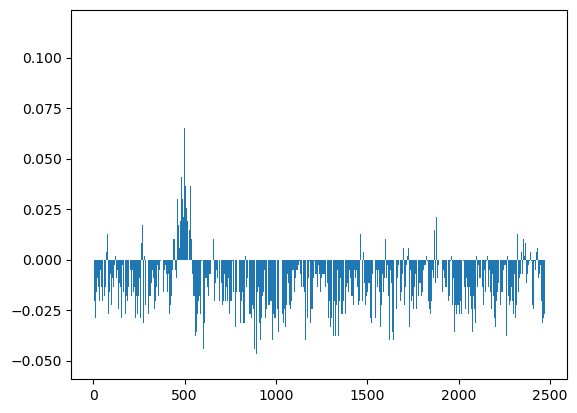

In [6]:
fig, ax = plt.subplots(1)

viewpoint_1 = 500
viewpoint_2 = 1300

y_1 = gw_coseg_matrix_1NP[viewpoint_1, :]
y_1[ np.where(gw_coseg_matrix_1NP[viewpoint_1, :] == 0)] = np.nan
ax.bar(np.arange(0, gw_coseg_matrix_1NP[viewpoint_1, :].shape[0],1) , y_1 - 0.075,  width = 1);

#y_2 = gw_coseg_matrix_1NP[viewpoint_2, :]
#y_2[ np.where(gw_coseg_matrix_1NP[viewpoint_2, :] == 0)] = np.nan
#ax.plot(np.arange(0, gw_coseg_matrix_1NP[viewpoint_2, :].shape[0],1) , y_2, alpha = 0.7);


Le distribuzioni dei contatti genomewide sono quasi uguali, indipendentemente dal viewpoint

Quello che faccio qui di seguito è plottarle, centrandole tutte sulla loro mediana

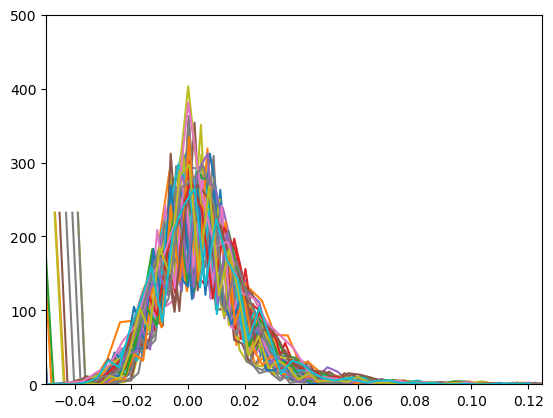

In [7]:
fig, ax = plt.subplots(1)
for i in range(0, gw_coseg_matrix_1NP.shape[0], 50):
    viewpoint_1 = i
    
    y_1 = gw_coseg_matrix_1NP[viewpoint_1, :]
    y_1 = np.nan_to_num(y_1, nan= 0)
    hist = np.histogram(y_1,  50)
    med =  np.median(y_1)
    if(med != 0 ):
        ax.plot(hist[1][1:] - med, hist[0])
ax.set_xlim((-0.05, 0.125));
ax.set_ylim((0, 500));


- per ogni window posso prendere solo quelle che 

vedere com'è questa distribuzione per i singoli cromosomi

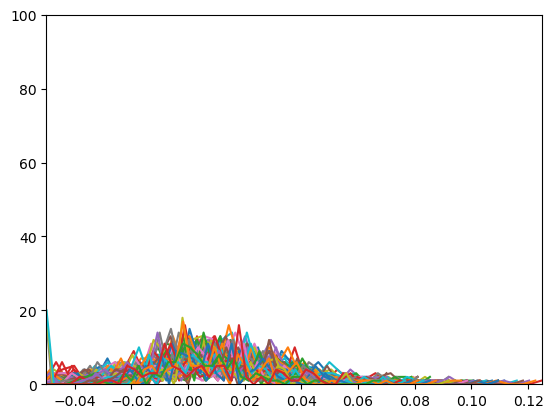

In [8]:
chr_inf = np.sum(chr_windows_sizes[:10])
chr_sup = np.sum(chr_windows_sizes[:11])

chr1_coseg = gw_coseg_matrix_1NP[chr_inf:chr_sup, chr_inf:chr_sup]

fig, ax = plt.subplots(1)
for i in range(chr1_coseg.shape[0]):
    viewpoint_1 = i
    
    y_1 = chr1_coseg[viewpoint_1, :]
    y_1 = np.nan_to_num(y_1, nan= 0)
    hist = np.histogram(y_1,  50)
    med =  np.median(y_1)
    if(med != 0 ):
        ax.plot(hist[1][1:] - med, hist[0])
ax.set_xlim((-0.05, 0.125));
ax.set_ylim((0, 100));


# Mean interaction per chromosome couple 1NP #

## heatmaps ##

In [3]:
coseg_means = np.zeros((19,19))
nld_means   = np.zeros((19,19))

coseg_means_nonzero = np.zeros((19,19))
nld_means_nonzero   = np.zeros((19,19))

In [4]:
for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        coseg_means[i, j] = np.nanmean(gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column])
        nld_means[i, j]   = np.nanmean(gw_norm_link_disq_1NP[start_row:stop_row, start_column:stop_column])
    
        temp_1 = np.copy(gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_norm_link_disq_1NP[start_row:stop_row, start_column:stop_column])
        temp_2[temp_2== 0] = np.nan
        


        coseg_means_nonzero[i, j] = np.nanmean( temp_1  )
        nld_means_nonzero[i, j]   = np.nanmean( temp_2  )
        
        #gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column].flatten()
del temp_1, temp_2

/home/federico/Università/Tesi_magistrale/my_programs/contact_matrix_utils.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);


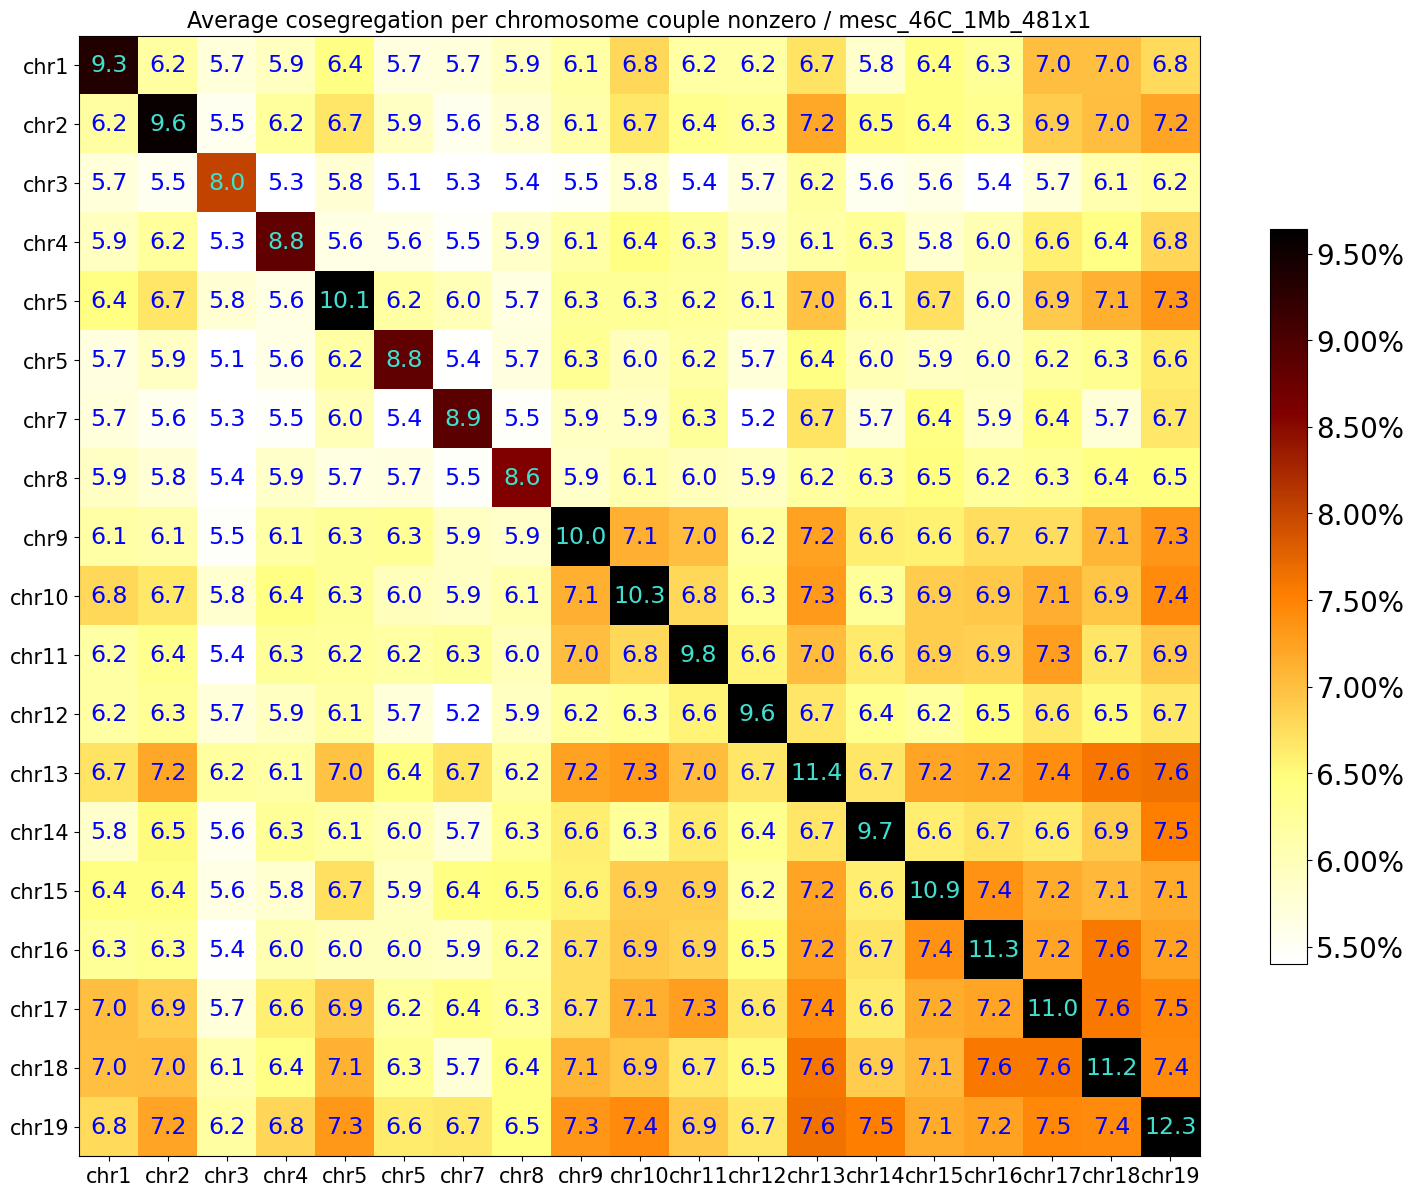

In [5]:
# fig, ax, _, _ = plot_heatmap(coseg_means, x_figsize= 15, y_figsize= 15)

# for i in range(19):
#     for j in range(19):
#         text = ax.text(j, i, np.around(coseg_means[i, j], decimals=2),
#                        ha="center", va="center", color="grey")

# ax.set_title("Average coseg per chromosome couple " + " / " + name_root_1NP_1Mb, fontsize = 16)
# ax.set_xticks(np.arange(0,19, 1))
# ax.set_yticks(np.arange(0,19, 1))
# ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
# ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);



# fig.tight_layout()
#coseg_means[np.tril_indices(coseg_means.shape[0], -1)] = np.nan

# fig, ax, _, _ = plot_heatmap(nld_means, x_figsize= 15, y_figsize= 15)

# for i in range(19):
#     for j in range(19):
#         text = ax.text(j, i, np.around(nld_means[i, j], decimals=2),
#                        ha="center", va="center", color="grey")

# ax.set_title("Average nld per chromosome couple " + " / " + name_root_1NP_1Mb, fontsize = 16)

# ax.set_xticks(np.arange(0,19, 1))
# ax.set_yticks(np.arange(0,19, 1))
# ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
# ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);



# fig.tight_layout()
#nld_means[np.tril_indices(nld_means.shape[0], -1)] = np.nan


fig, ax, c, _ = plot_heatmap(coseg_means_nonzero, x_figsize= 15, y_figsize= 15, percent=True)

for i in range(19):
    for j in range(19):
        if(i!=j):
            text = ax.text(j, i, str(np.around(coseg_means_nonzero[i, j]*100, decimals=1)),
                        ha="center", va="center", color="blue", fontsize = 17)
        if(i==j):
            text = ax.text(j, i, str(np.around(coseg_means_nonzero[i, j]*100, decimals=1)),
                       ha="center", va="center", color="turquoise", fontsize = 17)
        

ax.set_title("Average cosegregation per chromosome couple nonzero" + " / " + name_root_1NP_1Mb, fontsize = 16)

ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 15);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 15);

c.ax.tick_params(axis='y', which='major', labelsize=20)

fig.tight_layout()
#coseg_means_nonzero[np.tril_indices(coseg_means_nonzero.shape[0], -1)] = np.nan

# fig, ax, _, _ = plot_heatmap(nld_means_nonzero, x_figsize= 15, y_figsize= 15)

# for i in range(19):
#     for j in range(19):
#         text = ax.text(j, i, np.around(nld_means_nonzero[i, j], decimals=2),
#                        ha="center", va="center", color="grey")

# ax.set_title("Average nld per chromosome couple nonzero" + " / " + name_root_1NP_1Mb, fontsize = 16)

# ax.set_xticks(np.arange(0,19, 1))
# ax.set_yticks(np.arange(0,19, 1))
# ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
# ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);

# fig.tight_layout()
#nld_means_nonzero[np.tril_indices(nld_means_nonzero.shape[0], -1)] = np.nan

In [15]:
off_diag = np.copy(coseg_means_nonzero)
diag = np.diagonal(coseg_means_nonzero)
np.fill_diagonal(off_diag, np.nan)
np.nanmean(off_diag)*100, np.nanstd(off_diag)*100, np.nanmean(diag)*100, np.nanstd(diag)*100


(6.39949093476984, 0.5820687227346587, 9.985865434827799, 1.1004204610504134)

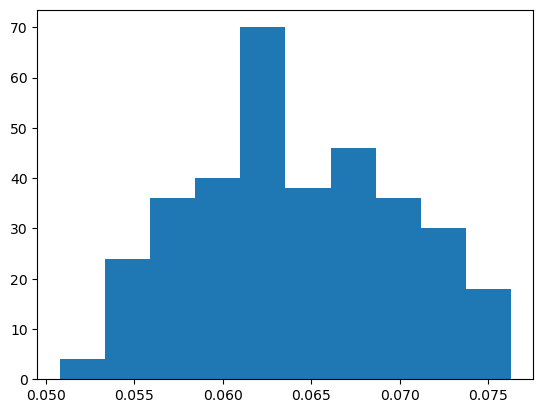

In [14]:
plt.hist(off_diag.flatten());

## histograms ##

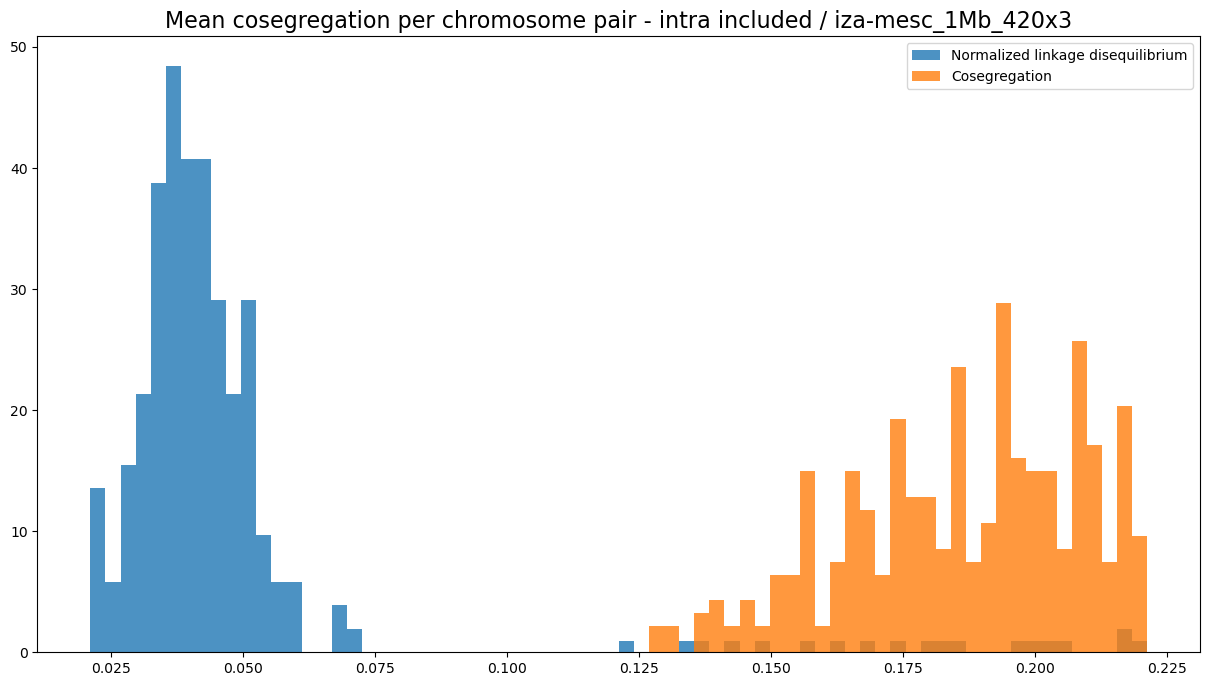

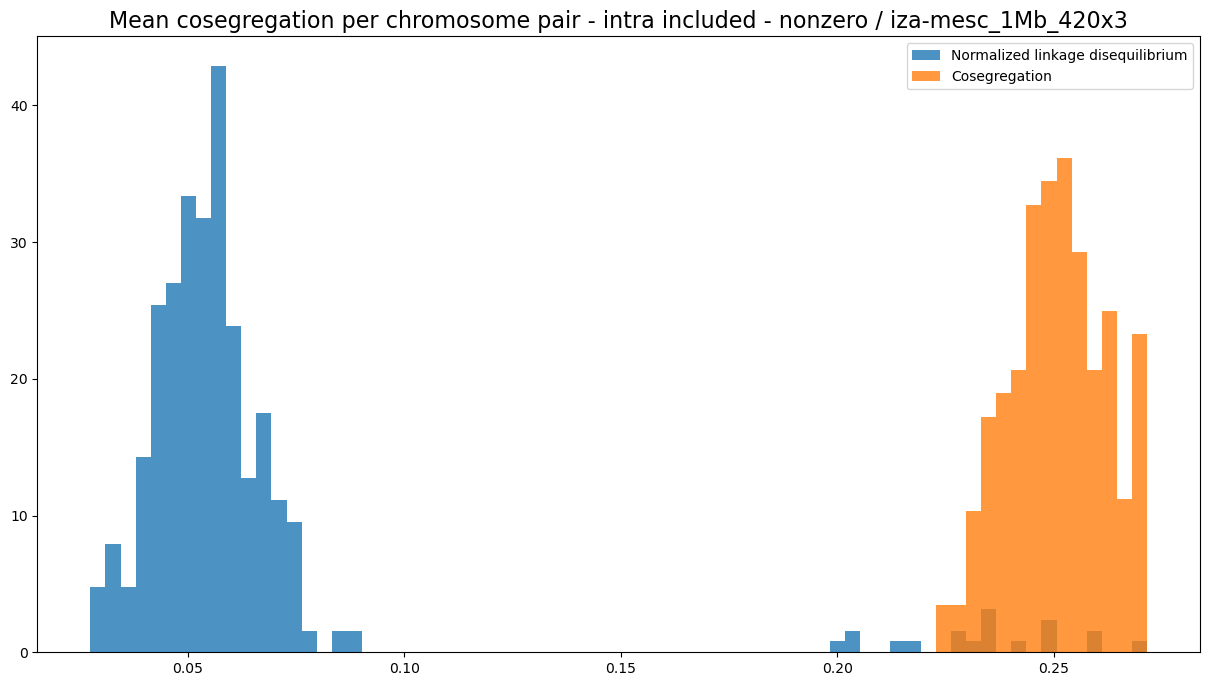

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
bins = ax.hist(nld_means.flatten(), bins = 70, density=True, alpha = 0.8, label = "Normalized linkage disequilibrium");
ax.hist(coseg_means.flatten(), bins = bins[1], density=True, alpha = 0.8, label = "Cosegregation");
#ax.set_ylim((0,50));
ax.set_title("Mean cosegregation per chromosome pair - intra included" + " / " + name_root_1NP_1Mb, fontsize = 16);
ax.legend();

fig_1, ax_1 = plt.subplots(figsize=(15, 8))
bins = ax_1.hist(nld_means_nonzero.flatten(), bins = 70, density=True, alpha = 0.8, label="Normalized linkage disequilibrium");
ax_1.hist(coseg_means_nonzero.flatten(), bins = bins[1], density=True, alpha = 0.8, label="Cosegregation");
#ax.set_ylim((0,50));
ax_1.set_title("Mean cosegregation per chromosome pair - intra included - nonzero" + " / " + name_root_1NP_1Mb, fontsize = 16);
ax_1.legend();

La normalized linkage disequilibrium ha chiaramente due picchi:  uno in 0.05, le coppie di cromosomi in inter interagenti ed uno intorno a 0.27 per i contatti in intra

Stessa cosa per la cosegregation: un picco intorno a 0.07 per le coppie di cromosomi in inter e uno intorno a 0.10 per quelli in intra

C'è un altro fatto: c'è evidentemente un bias nella dimensione dei cromosomi, più corti sono più la normalized linkage diseq (e forse anche la coseg) tende ad essere grande

## scatter plots ##

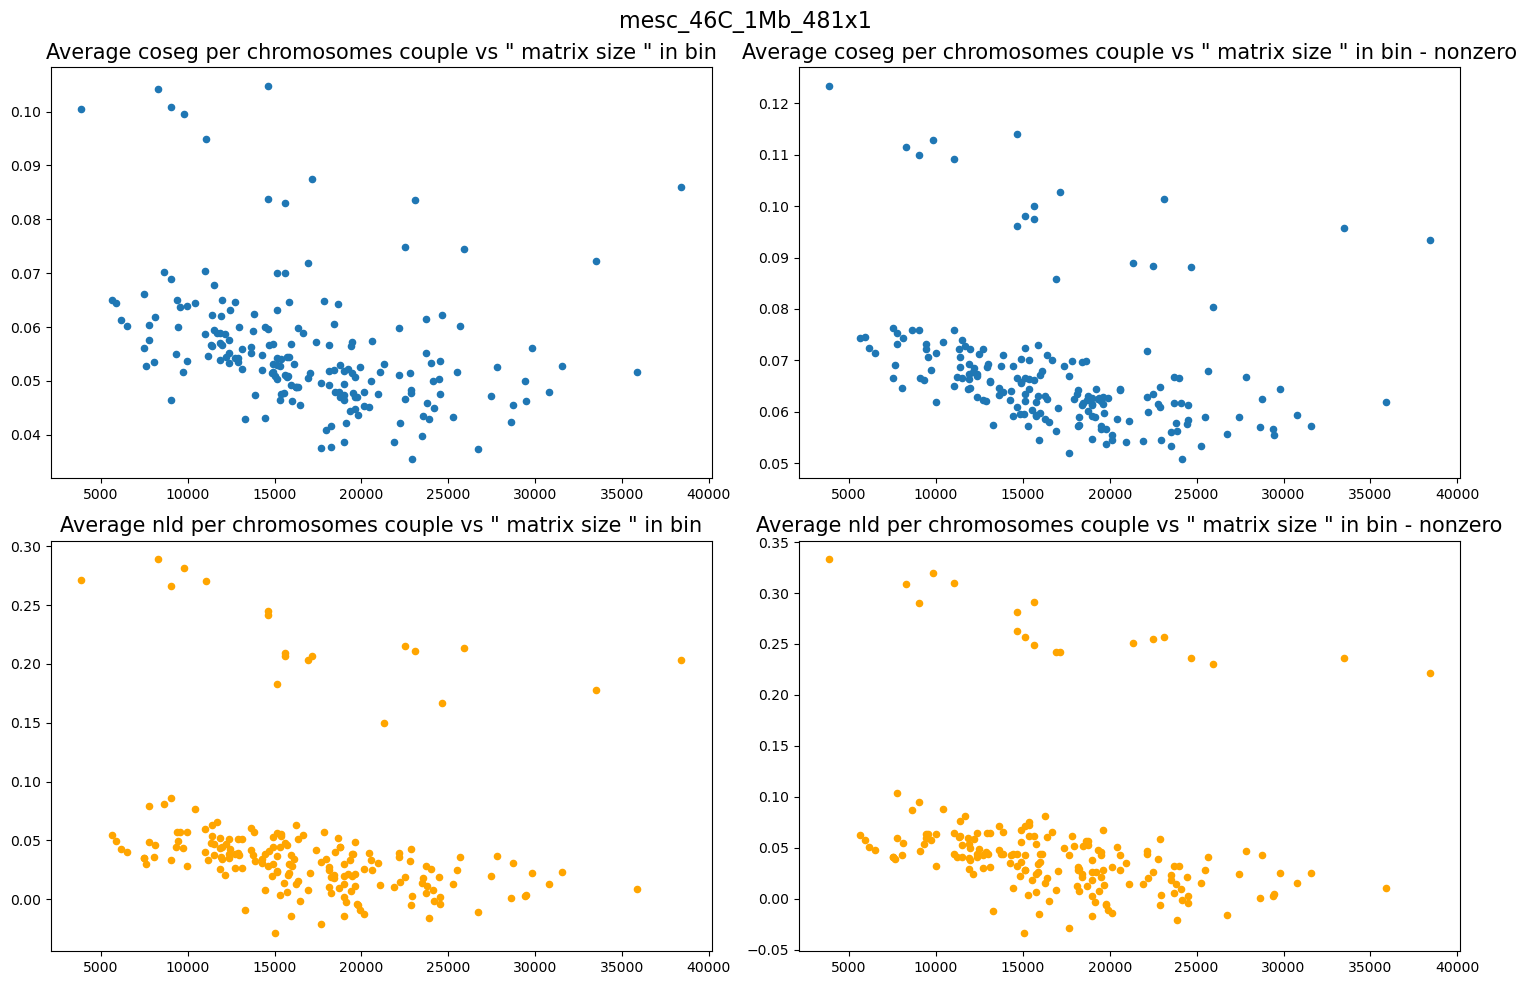

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (15,10))

x_1 = []
y_1 = []
y_2 = []
y_3 = []
y_4 = []



for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(coseg_means[i,j])
            y_2.append(nld_means[i,j])
            y_3.append(coseg_means_nonzero[i,j])
            y_4.append(nld_means_nonzero[i,j])


chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1, y_2, y_3, y_4]).T, columns=['x', 'y1', 'y2', 'y3', 'y4'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


ax[0, 0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 1], s = 20)
ax[1, 0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 2], s = 20, color = "orange")
ax[0, 1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 3], s = 20)
ax[1, 1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 4], s = 20, color = "orange")

ax[0, 0].set_title("Average coseg per chromosomes couple vs \" matrix size \" in bin", fontsize = 15)
ax[1, 0].set_title("Average nld per chromosomes couple vs \" matrix size \" in bin", fontsize = 15)
ax[0, 1].set_title("Average coseg per chromosomes couple vs \" matrix size \" in bin - nonzero", fontsize = 15)
ax[1, 1].set_title("Average nld per chromosomes couple vs \" matrix size \" in bin - nonzero", fontsize = 15)

fig.suptitle(name_root_1NP_1Mb, fontsize=16)

fig.tight_layout()


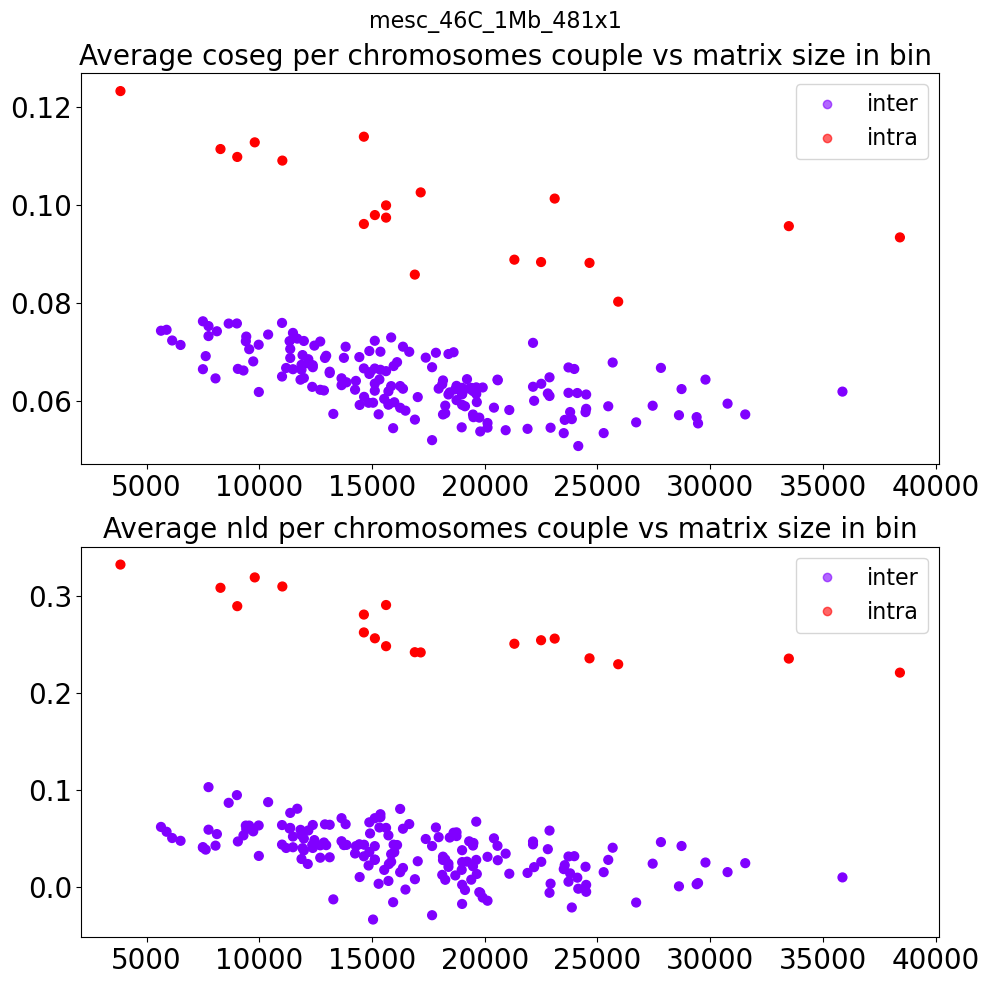

In [10]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

x_1 = []
y_1 = []
y_2 = []
y_3 = []
y_4 = []
diagonal_labels = []



for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(coseg_means[i,j])
            y_2.append(nld_means[i,j])
            y_3.append(coseg_means_nonzero[i,j])
            y_4.append(nld_means_nonzero[i,j])
            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)


chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1, y_2, y_3, y_4, diagonal_labels]).T, columns=['x', 'y1', 'y2', 'y3', 'y4', 'colors'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


scatter_0 = ax[0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 3], s = 40, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')
scatter_1 = ax[1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 4], s = 40, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')


ax[0].set_title("Average coseg per chromosomes couple vs matrix size in bin ", fontsize = 20)
ax[1].set_title("Average nld per chromosomes couple vs matrix size in bin", fontsize = 20)


ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

handles_0, _ = scatter_0.legend_elements(prop="colors", alpha=0.6)
ax[0].legend(handles_0, ['inter', 'intra'], loc="upper right", fontsize = 16)

handles_1, _ = scatter_1.legend_elements(prop="colors", alpha=0.6)
ax[1].legend(handles_1, ['inter', 'intra'], loc="upper right", fontsize = 16)

fig.suptitle(name_root_1NP_1Mb, fontsize=16)
fig.tight_layout()

del x_1, y_1, y_2, y_3 ,y_4, chr_interaction_vs_lenght, scatter_0, scatter_1, handles_0, handles_1



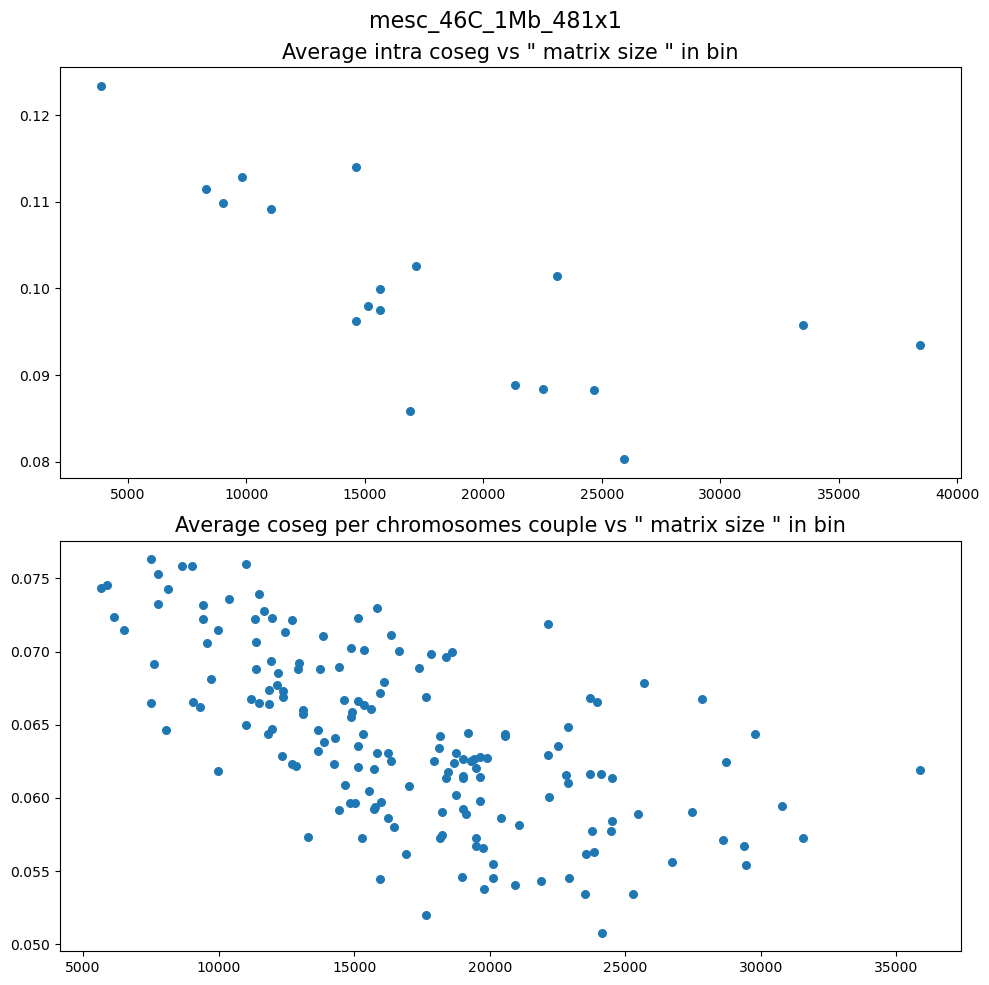

In [33]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

inter_x = []
intra_x = []
y_1 = []
y_2 = []




for i in range(19):
    for j in range(i, 19):

            if(i == j):
                
                intra_x.append(chr_windows_sizes[i] * chr_windows_sizes[j])
                y_1.append(coseg_means_nonzero[i,j])
            else:
                
                inter_x.append(chr_windows_sizes[i] * chr_windows_sizes[j])
                y_2.append(coseg_means_nonzero[i,j])

ax[0].scatter(intra_x, y_1, s = 30)
ax[1].scatter(inter_x, y_2, s = 30)


ax[0].set_title("Average intra coseg vs \" matrix size \" in bin", fontsize = 15)
ax[1].set_title("Average coseg per chromosomes couple vs \" matrix size \" in bin", fontsize = 15)



fig.suptitle(name_root_1NP_1Mb, fontsize=16)
fig.tight_layout()

del intra_x, inter_x, y_1, y_2



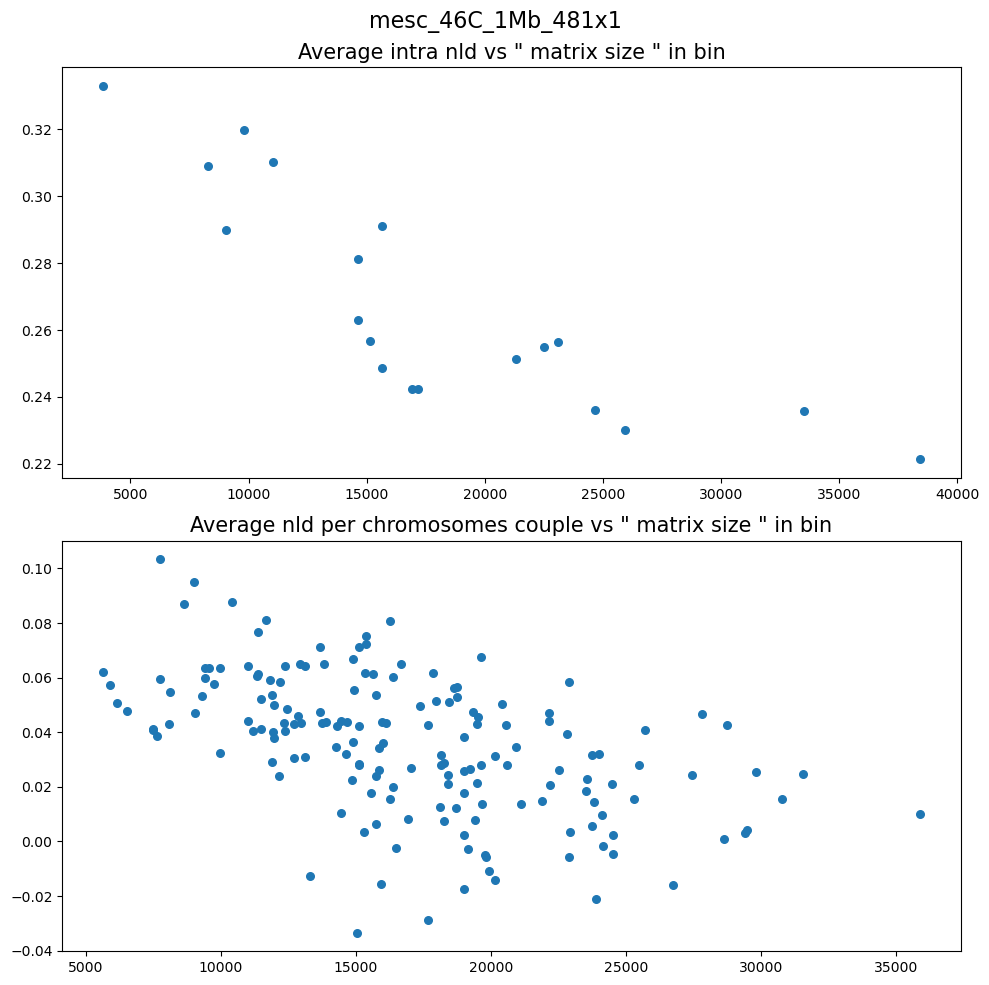

In [35]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

inter_x = []
intra_x = []
y_1 = []
y_2 = []




for i in range(19):
    for j in range(i, 19):

            if(i == j):
                
                intra_x.append(chr_windows_sizes[i] * chr_windows_sizes[j])
                y_1.append(nld_means_nonzero[i,j])
            else:
                
                inter_x.append(chr_windows_sizes[i] * chr_windows_sizes[j])
                y_2.append(nld_means_nonzero[i,j])

ax[0].scatter(intra_x, y_1, s = 30)
ax[1].scatter(inter_x, y_2, s = 30)


ax[0].set_title("Average intra nld vs \" matrix size \" in bin", fontsize = 15)
ax[1].set_title("Average nld per chromosomes couple vs \" matrix size \" in bin", fontsize = 15)



fig.suptitle(name_root_1NP_1Mb, fontsize=16)
fig.tight_layout()

del intra_x, inter_x, y_1, y_2



# Mean interaction per chromosome couple 3NP #

## heatmaps ##

In [12]:
coseg_means = np.zeros((19,19))
nld_means   = np.zeros((19,19))

coseg_means_nonzero = np.zeros((19,19))
nld_means_nonzero   = np.zeros((19,19))

In [13]:
for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        coseg_means[i, j] = np.nanmean(gw_coseg_matrix_3NP[start_row:stop_row, start_column:stop_column])
        nld_means[i, j]   = np.nanmean(gw_norm_link_disq_3NP[start_row:stop_row, start_column:stop_column])
    
        temp_1 = np.copy(gw_coseg_matrix_3NP[start_row:stop_row, start_column:stop_column])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_norm_link_disq_3NP[start_row:stop_row, start_column:stop_column])
        temp_2[temp_2== 0] = np.nan
        


        coseg_means_nonzero[i, j] = np.nanmean( temp_1  )
        nld_means_nonzero[i, j]   = np.nanmean( temp_2  )
        
        #gw_coseg_matrix_3NP[start_row:stop_row, start_column:stop_column].flatten()
del temp_1, temp_2

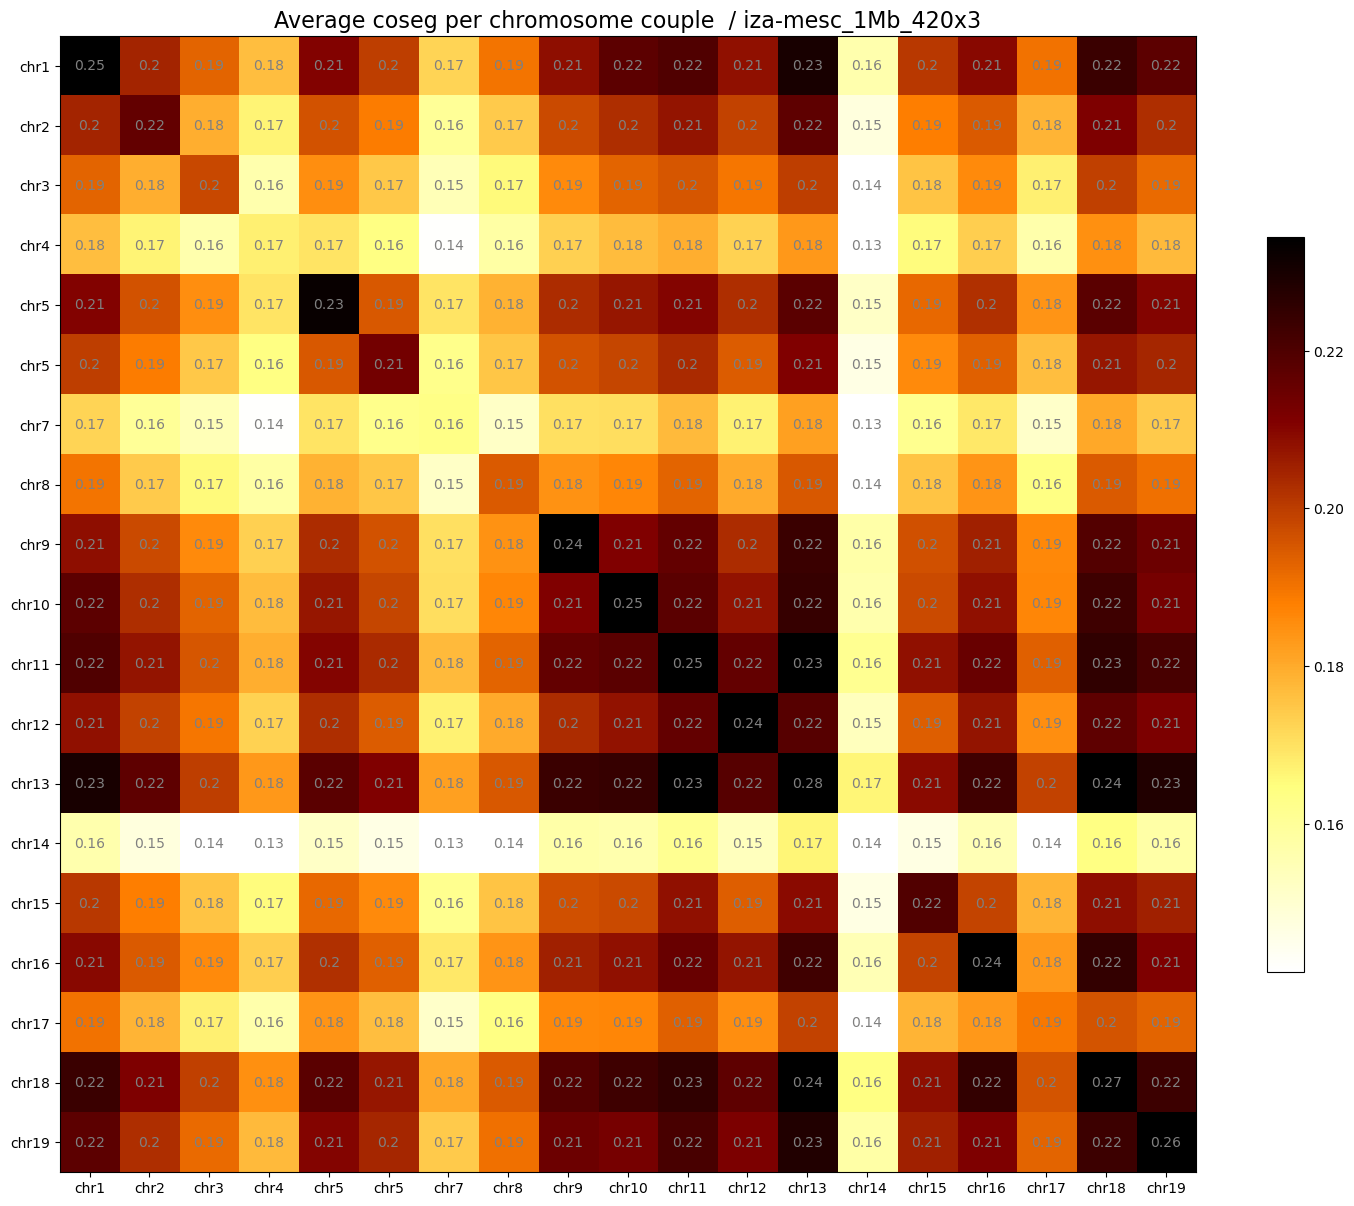

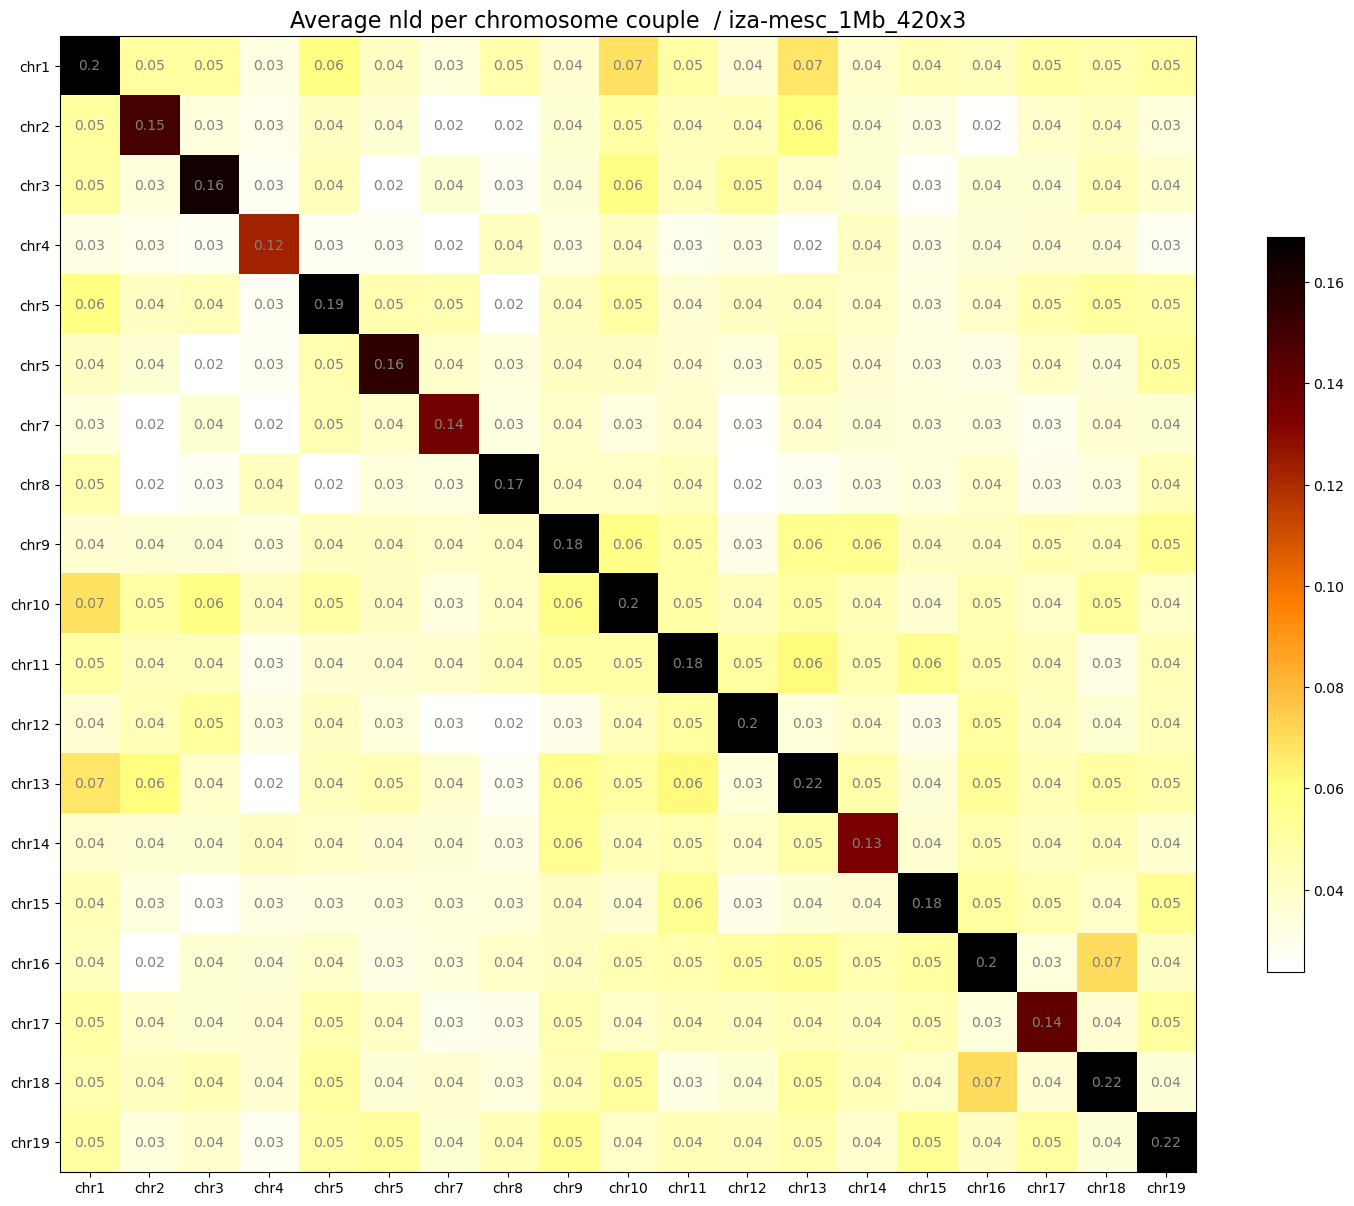

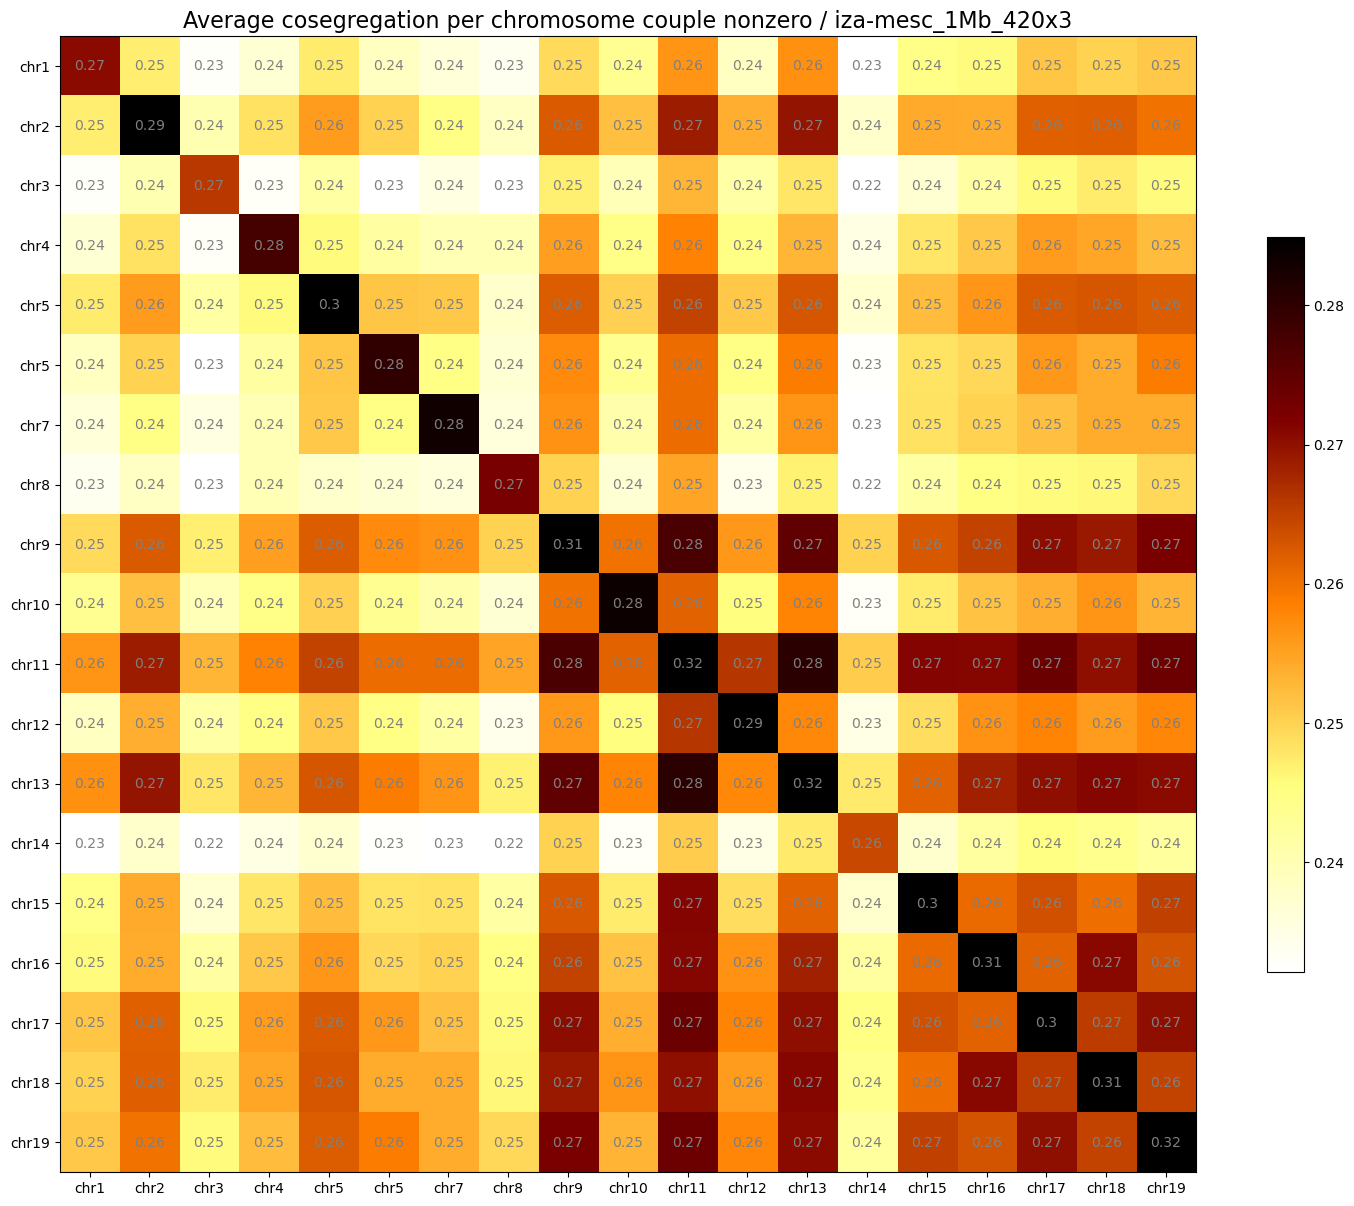

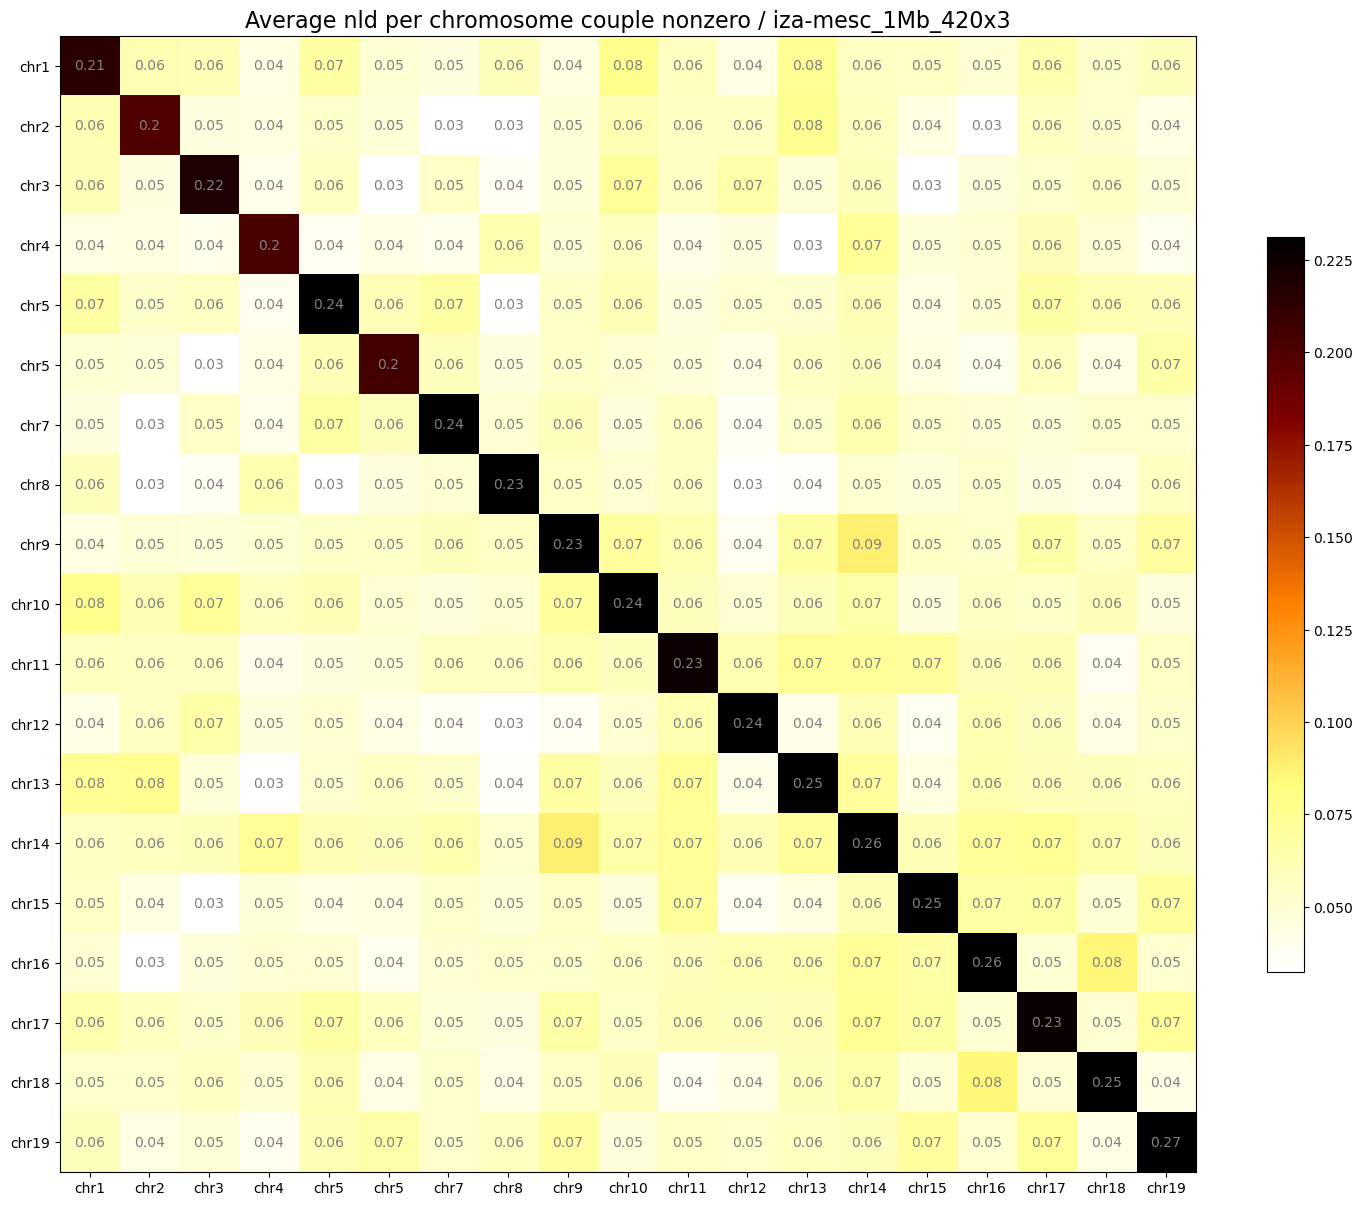

In [17]:
fig, ax, _, _ = plot_heatmap(coseg_means, x_figsize= 15, y_figsize= 15)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(coseg_means[i, j], decimals=2),
                       ha="center", va="center", color="grey")

ax.set_title("Average coseg per chromosome couple " + " / " + name_root_3NP_1Mb, fontsize = 16)
ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);



fig.tight_layout()
#coseg_means[np.tril_indices(coseg_means.shape[0], -1)] = np.nan

fig, ax, _, _ = plot_heatmap(nld_means, x_figsize= 15, y_figsize= 15)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(nld_means[i, j], decimals=2),
                       ha="center", va="center", color="grey")

ax.set_title("Average nld per chromosome couple " + " / " + name_root_3NP_1Mb, fontsize = 16)

ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);



fig.tight_layout()
#nld_means[np.tril_indices(nld_means.shape[0], -1)] = np.nan


fig, ax, _, _ = plot_heatmap(coseg_means_nonzero, x_figsize= 15, y_figsize= 15)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(coseg_means_nonzero[i, j], decimals=2),
                       ha="center", va="center", color="grey")

ax.set_title("Average cosegregation per chromosome couple nonzero" + " / " + name_root_3NP_1Mb, fontsize = 16)

ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);



fig.tight_layout()
#coseg_means_nonzero[np.tril_indices(coseg_means_nonzero.shape[0], -1)] = np.nan

fig, ax, _, _ = plot_heatmap(nld_means_nonzero, x_figsize= 15, y_figsize= 15)

for i in range(19):
    for j in range(19):
        text = ax.text(j, i, np.around(nld_means_nonzero[i, j], decimals=2),
                       ha="center", va="center", color="grey")

ax.set_title("Average nld per chromosome couple nonzero" + " / " + name_root_3NP_1Mb, fontsize = 16)

ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);

fig.tight_layout()
#nld_means_nonzero[np.tril_indices(nld_means_nonzero.shape[0], -1)] = np.nan

## histograms ##

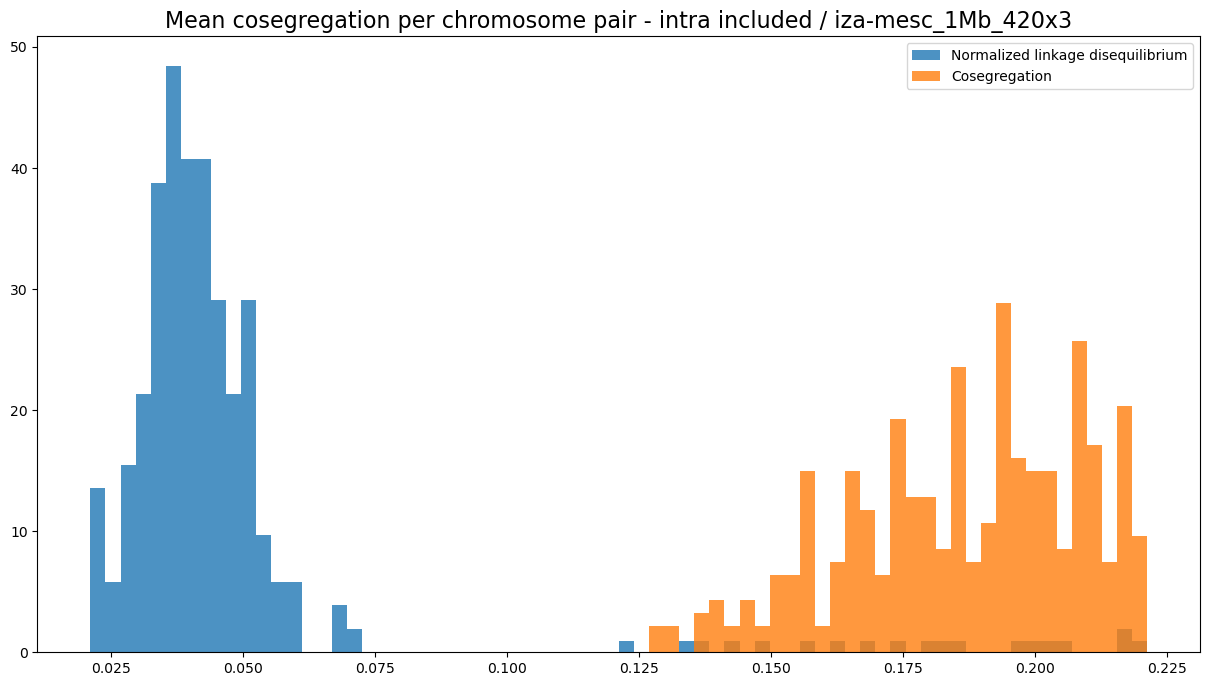

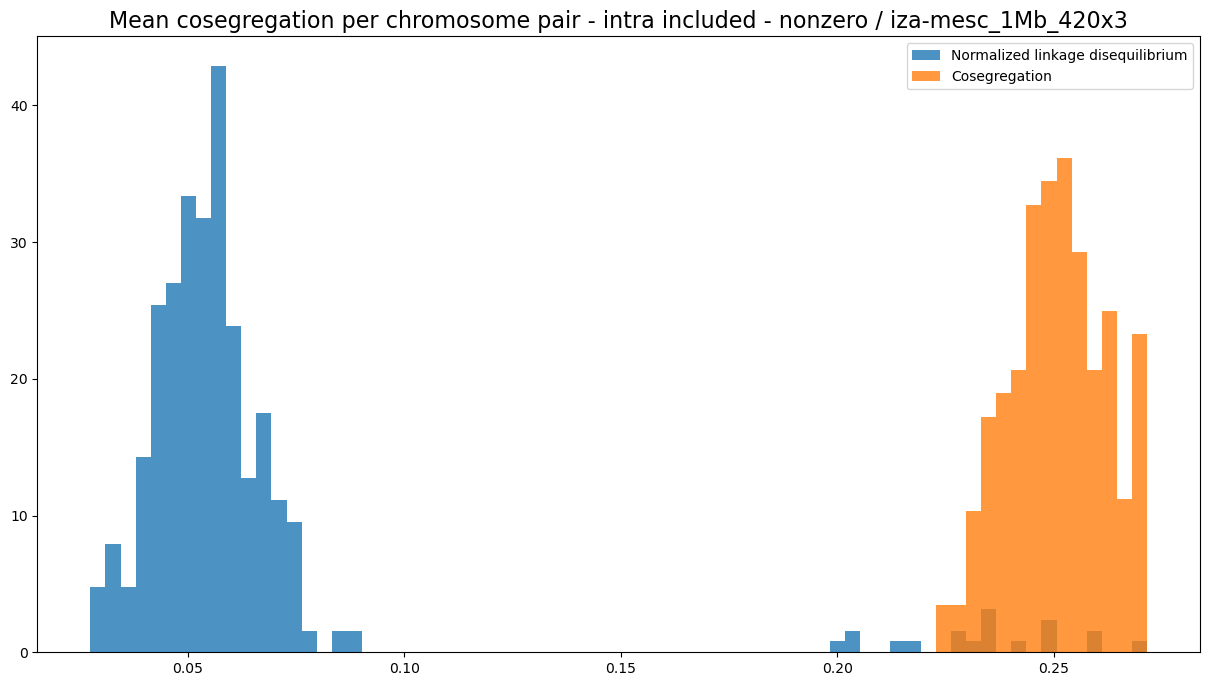

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))
bins = ax.hist(nld_means.flatten(), bins = 70, density=True, alpha = 0.8, label = "Normalized linkage disequilibrium");
ax.hist(coseg_means.flatten(), bins = bins[1], density=True, alpha = 0.8, label = "Cosegregation");
#ax.set_ylim((0,50));
ax.set_title("Mean cosegregation per chromosome pair - intra included" + " / " + name_root_3NP_1Mb, fontsize = 16);
ax.legend();

fig_1, ax_1 = plt.subplots(figsize=(15, 8))
bins = ax_1.hist(nld_means_nonzero.flatten(), bins = 70, density=True, alpha = 0.8, label="Normalized linkage disequilibrium");
ax_1.hist(coseg_means_nonzero.flatten(), bins = bins[1], density=True, alpha = 0.8, label="Cosegregation");
#ax.set_ylim((0,50));
ax_1.set_title("Mean cosegregation per chromosome pair - intra included - nonzero" + " / " + name_root_3NP_1Mb, fontsize = 16);
ax_1.legend();

La normalized linkage disequilibrium ha chiaramente due picchi:  uno in 0.05, le coppie di cromosomi in inter interagenti ed uno intorno a 0.27 per i contatti in intra

Stessa cosa per la cosegregation: un picco intorno a 0.07 per le coppie di cromosomi in inter e uno intorno a 0.10 per quelli in intra

C'è un altro fatto: c'è evidentemente un bias nella dimensione dei cromosomi, più corti sono più la normalized linkage diseq (e forse anche la coseg) tende ad essere grande

## scatter plots ##

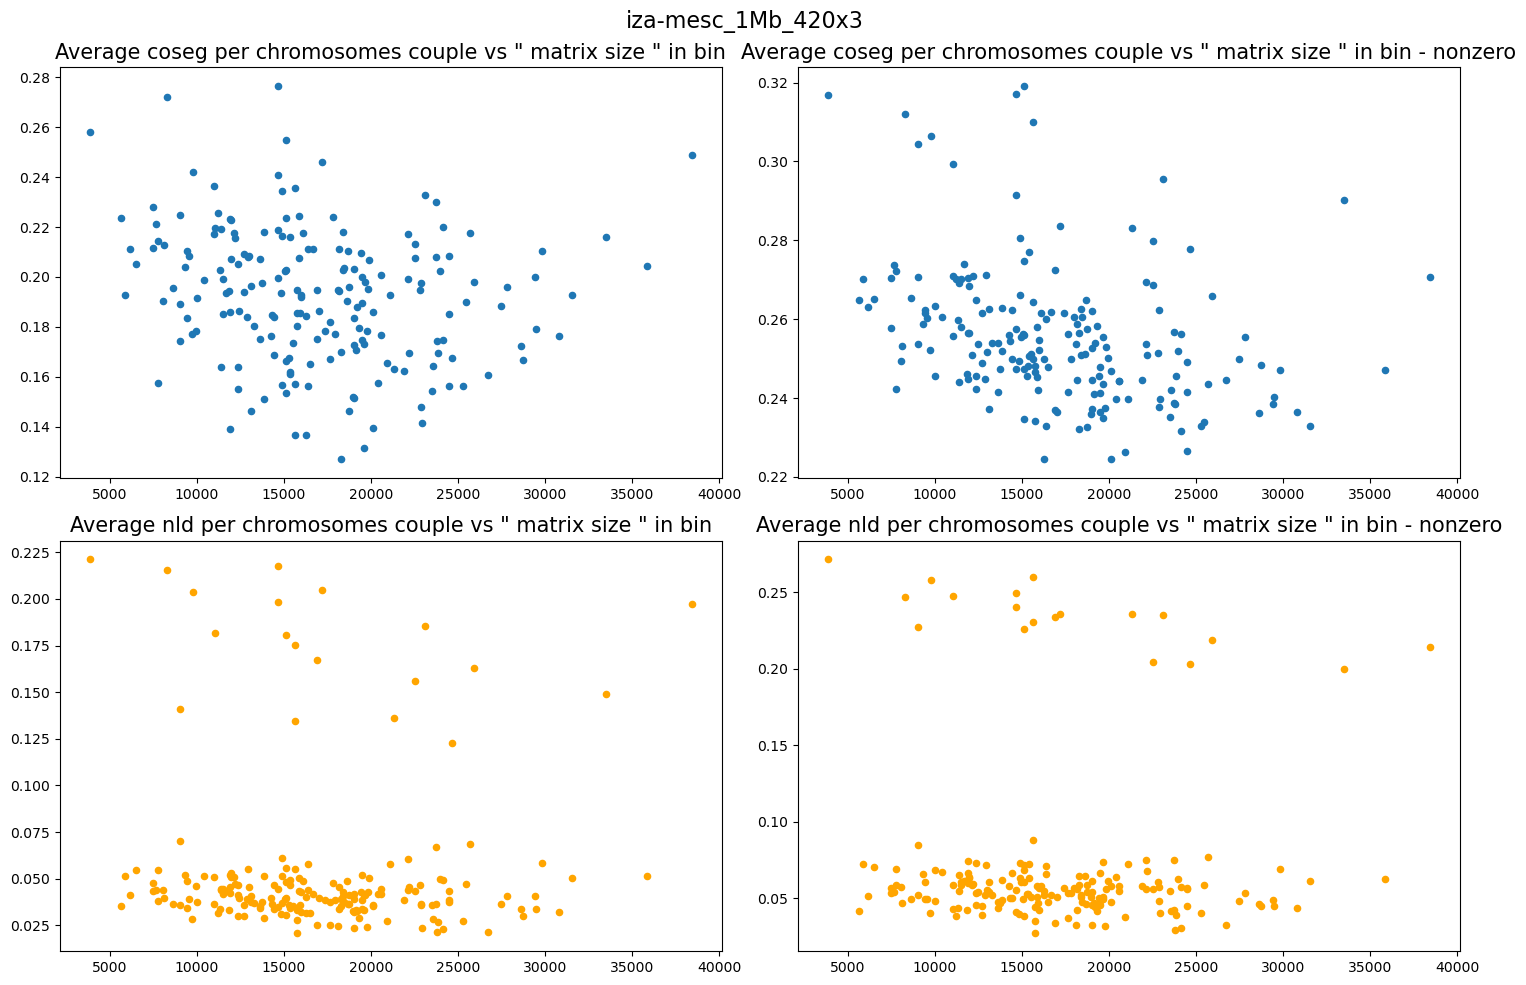

In [40]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (15,10))

x_1 = []
y_1 = []
y_2 = []
y_3 = []
y_4 = []



for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(coseg_means[i,j])
            y_2.append(nld_means[i,j])
            y_3.append(coseg_means_nonzero[i,j])
            y_4.append(nld_means_nonzero[i,j])


chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1, y_2, y_3, y_4]).T, columns=['x', 'y1', 'y2', 'y3', 'y4'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


ax[0, 0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 1], s = 20)
ax[1, 0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 2], s = 20, color = "orange")
ax[0, 1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 3], s = 20)
ax[1, 1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 4], s = 20, color = "orange")

ax[0, 0].set_title("Average coseg per chromosomes couple vs \" matrix size \" in bin", fontsize = 15)
ax[1, 0].set_title("Average nld per chromosomes couple vs \" matrix size \" in bin", fontsize = 15)
ax[0, 1].set_title("Average coseg per chromosomes couple vs \" matrix size \" in bin - nonzero", fontsize = 15)
ax[1, 1].set_title("Average nld per chromosomes couple vs \" matrix size \" in bin - nonzero", fontsize = 15)

fig.suptitle(name_root_3NP_1Mb, fontsize=16)

fig.tight_layout()


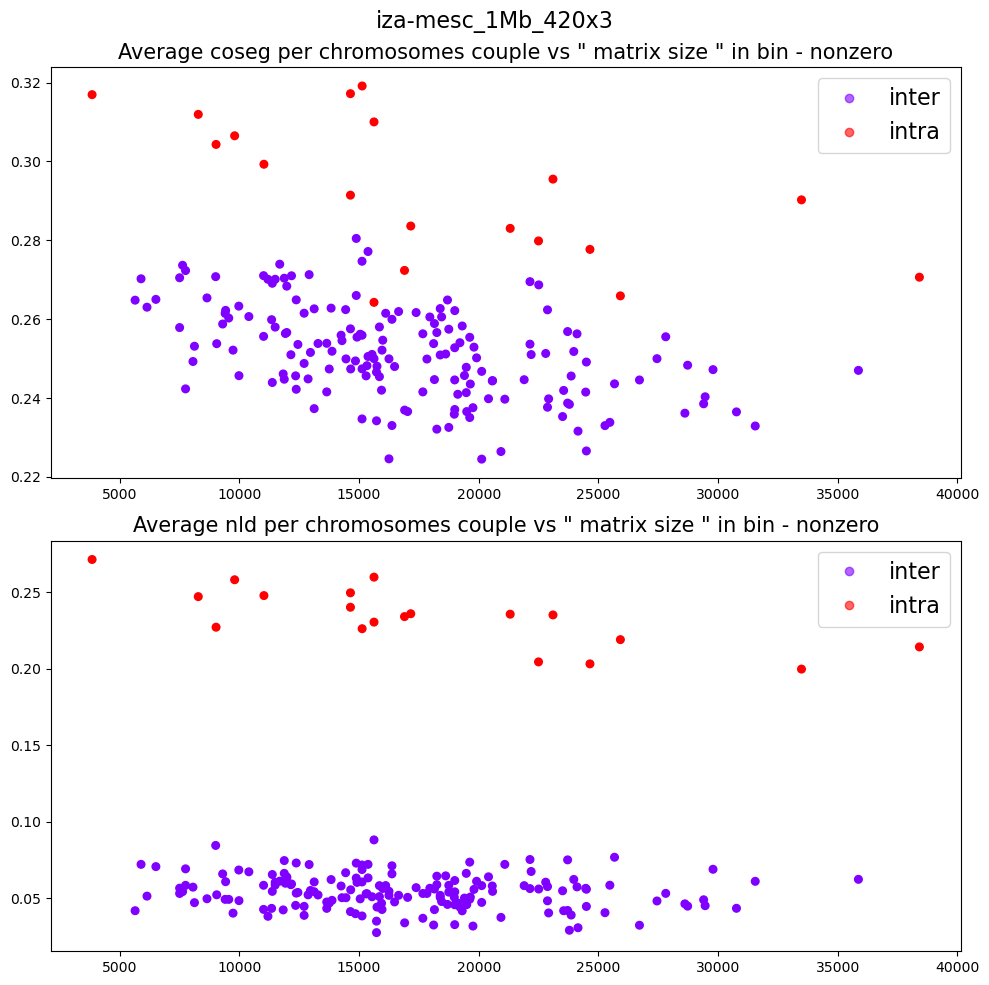

In [41]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

x_1 = []
y_1 = []
y_2 = []
y_3 = []
y_4 = []
diagonal_labels = []



for i in range(19):
    for j in range(i, 19):
        
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(coseg_means[i,j])
            y_2.append(nld_means[i,j])
            y_3.append(coseg_means_nonzero[i,j])
            y_4.append(nld_means_nonzero[i,j])
            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)


chr_interaction_vs_lenght = pd.DataFrame(data = np.array([x_1, y_1, y_2, y_3, y_4, diagonal_labels]).T, columns=['x', 'y1', 'y2', 'y3', 'y4', 'colors'] )
chr_interaction_vs_lenght.sort_values(by = ['x'], inplace=True)


scatter_0 = ax[0].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 3], s = 30, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')
scatter_1 = ax[1].scatter(chr_interaction_vs_lenght.values[:, 0], chr_interaction_vs_lenght.values[:, 4], s = 30, c = chr_interaction_vs_lenght.values[:, -1], cmap = 'rainbow')


ax[0].set_title("Average coseg per chromosomes couple vs \" matrix size \" in bin - nonzero", fontsize = 15)
ax[1].set_title("Average nld per chromosomes couple vs \" matrix size \" in bin - nonzero", fontsize = 15)


handles_0, _ = scatter_0.legend_elements(prop="colors", alpha=0.6)
ax[0].legend(handles_0, ['inter', 'intra'], loc="upper right", fontsize = 16)

handles_1, _ = scatter_1.legend_elements(prop="colors", alpha=0.6)
ax[1].legend(handles_1, ['inter', 'intra'], loc="upper right", fontsize = 16)

fig.suptitle(name_root_3NP_1Mb, fontsize=16)
fig.tight_layout()

del x_1, y_1, y_2, y_3 ,y_4, chr_interaction_vs_lenght, scatter_0, scatter_1, handles_0, handles_1



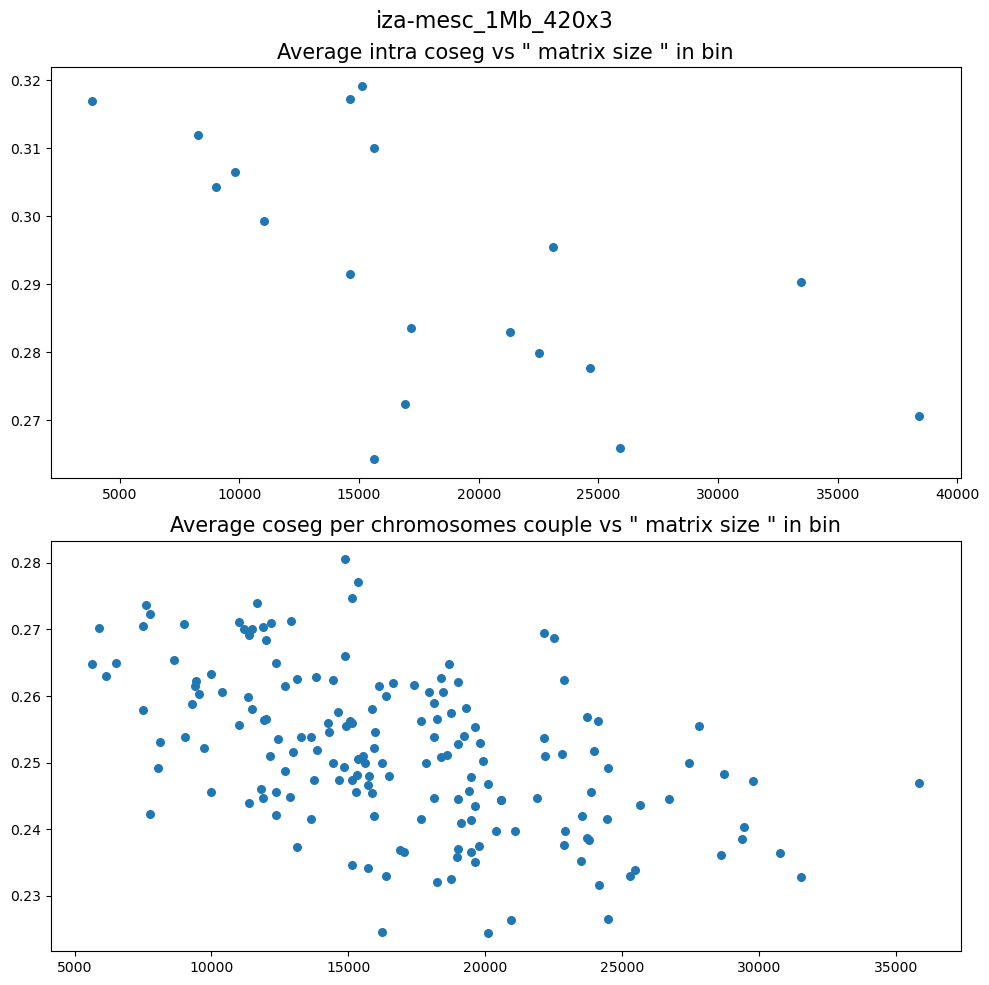

In [42]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

inter_x = []
intra_x = []
y_1 = []
y_2 = []




for i in range(19):
    for j in range(i, 19):

            if(i == j):
                
                intra_x.append(chr_windows_sizes[i] * chr_windows_sizes[j])
                y_1.append(coseg_means_nonzero[i,j])
            else:
                
                inter_x.append(chr_windows_sizes[i] * chr_windows_sizes[j])
                y_2.append(coseg_means_nonzero[i,j])

ax[0].scatter(intra_x, y_1, s = 30)
ax[1].scatter(inter_x, y_2, s = 30)


ax[0].set_title("Average intra coseg vs \" matrix size \" in bin", fontsize = 15)
ax[1].set_title("Average coseg per chromosomes couple vs \" matrix size \" in bin", fontsize = 15)



fig.suptitle(name_root_3NP_1Mb, fontsize=16)
fig.tight_layout()

del intra_x, inter_x, y_1, y_2



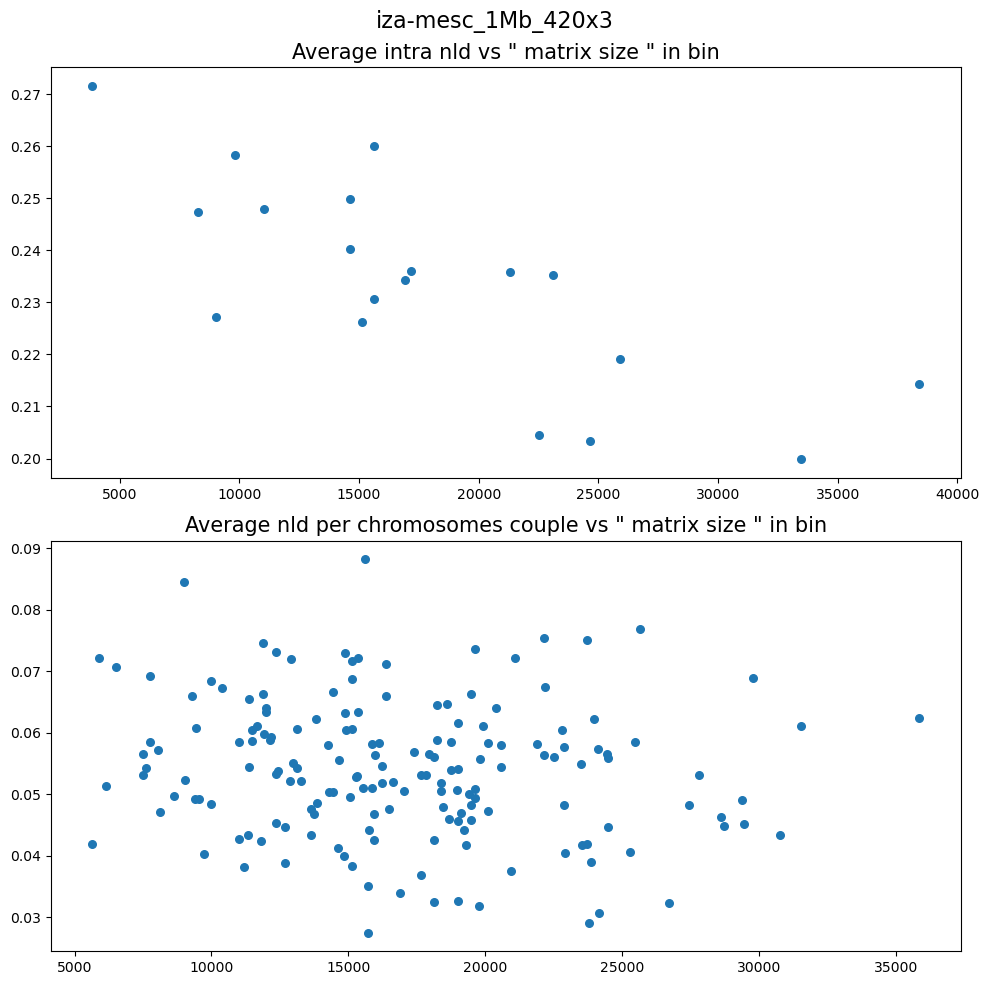

In [43]:
fig, ax = plt.subplots(nrows=2, figsize = (10,10))

inter_x = []
intra_x = []
y_1 = []
y_2 = []




for i in range(19):
    for j in range(i, 19):

            if(i == j):
                
                intra_x.append(chr_windows_sizes[i] * chr_windows_sizes[j])
                y_1.append(nld_means_nonzero[i,j])
            else:
                
                inter_x.append(chr_windows_sizes[i] * chr_windows_sizes[j])
                y_2.append(nld_means_nonzero[i,j])

ax[0].scatter(intra_x, y_1, s = 30)
ax[1].scatter(inter_x, y_2, s = 30)


ax[0].set_title("Average intra nld vs \" matrix size \" in bin", fontsize = 15)
ax[1].set_title("Average nld per chromosomes couple vs \" matrix size \" in bin", fontsize = 15)



fig.suptitle(name_root_3NP_1Mb, fontsize=16)
fig.tight_layout()

del intra_x, inter_x, y_1, y_2



## Distribution of contacts in single chromosomes ##

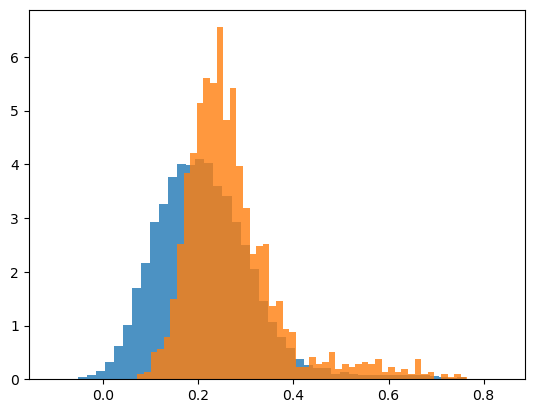

In [9]:
temp_1 = np.copy(gw_norm_link_disq_1NP[:196, :196].flatten())
temp_1[temp_1 == 0] = np.nan

temp_2 = np.copy(gw_norm_link_disq_1NP[np.sum(chr_windows_sizes[:-1]):, np.sum(chr_windows_sizes[:-1]):].flatten())
temp_2[temp_2 == 0] = np.nan

plt.hist(temp_1, density=True, bins = 50, alpha = 0.8);
plt.hist(temp_2, density=True, bins = 50, alpha = 0.8);

# Interazione media per cromosoma #

In [11]:
coseg_means_per_chromosome = np.zeros(19)
nld_means_per_chromosome   = np.zeros(19)

coseg_means_nonzero_per_chromosome = np.zeros(19)
nld_means_nonzero_per_chromosome   = np.zeros(19)

In [12]:
# adesso lavorare con coseg e nld simmetrizzate mi torna comodo

for i in range(gw_coseg_matrix_1NP.shape[0]):
    for j in range(i, gw_coseg_matrix_1NP.shape[0]):
        gw_coseg_matrix_1NP[j,i] = gw_coseg_matrix_1NP[i,j]
        gw_norm_link_disq_1NP[j,i] = gw_norm_link_disq_1NP[i,j]

In [13]:
for i in range(n_chromosomes):
    
    start_row    = np.sum(chr_windows_sizes[:i])
    stop_row     = start_row + chr_windows_sizes[i]

    chrA = chromosomes[i]
    
    coseg_means_per_chromosome[i] = np.nanmean(gw_coseg_matrix_1NP[start_row:stop_row, :])
    nld_means_per_chromosome[i]   = np.nanmean(gw_norm_link_disq_1NP[start_row:stop_row, :])

    temp_1 = np.copy(gw_coseg_matrix_1NP[start_row:stop_row, :])
    temp_1[temp_1== 0] = np.nan
    temp_2 = np.copy(gw_norm_link_disq_1NP[start_row:stop_row, :])
    temp_2[temp_2== 0] = np.nan
    


    coseg_means_nonzero_per_chromosome[i] = np.nanmean( temp_1  )
    nld_means_nonzero_per_chromosome[i]   = np.nanmean( temp_2  )
    
    #gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column].flatten()
del temp_1, temp_2

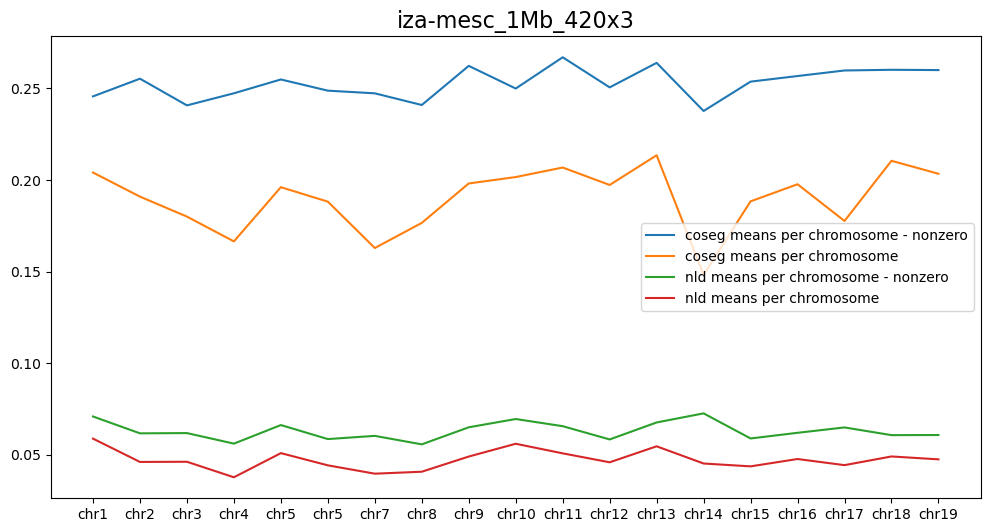

In [14]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(np.arange(1,20, 1), coseg_means_nonzero_per_chromosome, label = 'coseg means per chromosome - nonzero');
ax.plot(np.arange(1,20, 1), coseg_means_per_chromosome, label = 'coseg means per chromosome');
ax.plot(np.arange(1,20, 1), nld_means_nonzero_per_chromosome, label = 'nld means per chromosome - nonzero');
ax.plot(np.arange(1,20, 1), nld_means_per_chromosome, label = 'nld means per chromosome');

ax.set_xticks(np.arange(1,20, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_title(name_root_1NP_1Mb, fontsize = 16);
ax.legend();



Attenzione: qui con 1NP si osserva che il cromosoma sette interagisce meno degli altri! Vedere la figura 3i di scSPRITE!

anche se considero tutte le interazioni che ha ogni cromosoma con ogni altro questa dipende dalla distanza..\
vedere che succede se faccio sta cosa togliendo i contatti in intra..

# Conduco la stessa analisi sui dati Hi-C #

In [28]:
import hicstraw

In [29]:
hic_file_name = "/home/federico/Università/Tesi_magistrale/Yan_et_al_2018/" + "4DNFI3JYF9VS.hic"
hic = hicstraw.HiCFile(hic_file_name)
chr1 = hic.getChromosomes()[1]
print(chr1.length)
print(hic.getResolutions())

195471971
[10000000, 5000000, 2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000, 1000]


In [73]:
gw_hic = np.zeros((size, size))


for i in tqdm(range(n_chromosomes), leave=True):
    for j in tqdm(range(i, n_chromosomes), leave=False):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
                

        if i==j:
            current_chrom_hic = hic.getChromosomes()[i+1]
            name = current_chrom_hic.name
            start = 0;  end = current_chrom_hic.length 
            mzd = hic.getMatrixZoomData(name, name, "observed", "NONE", "BP", 1000000)
            mat = mzd.getRecordsAsMatrix(start, end, start,end)
            gw_hic[start_row:stop_row, start_column:stop_column] = mat
            
        else:

            current_chrom_hic_1 = hic.getChromosomes()[i+1]
            current_chrom_hic_2 = hic.getChromosomes()[j+1]
            name_1 = current_chrom_hic_1.name
            name_2 = current_chrom_hic_2.name
            start_1 = 0;  end_1 = current_chrom_hic_1.length 
            start_2 = 0;  end_2 = current_chrom_hic_2.length 
            
            mzd = hic.getMatrixZoomData(name_1, name_2, "observed", "NONE", "BP", 1000000)
            mat = mzd.getRecordsAsMatrix(start_1, end_1, start_2,end_2)
            gw_hic[start_row:stop_row, start_column:stop_column] = mat

100%|██████████| 19/19 [00:00<00:00, 34.56it/s]


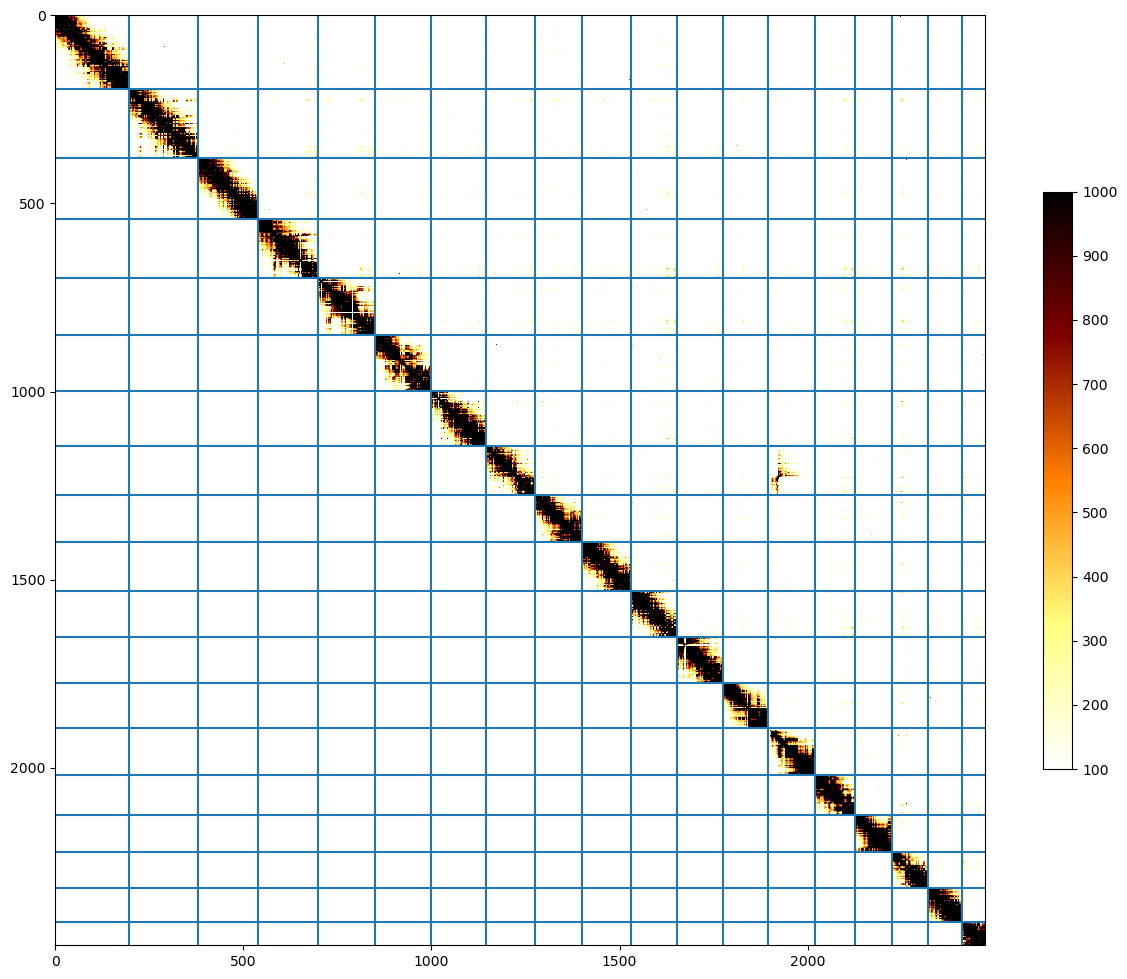

In [74]:
fig, ax, c, _ = plot_heatmap(gw_hic, vmin=100, vmax=1000, x_figsize=15, y_figsize=15)
for i in np.cumsum(chr_windows_sizes)[:-1]:
    ax.axhline(i);
    ax.axvline(i);

In [75]:
hic_means = np.zeros((19,19))
for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        hic_means[i, j] = np.nanmean(gw_hic[start_row:stop_row, start_column:stop_column])

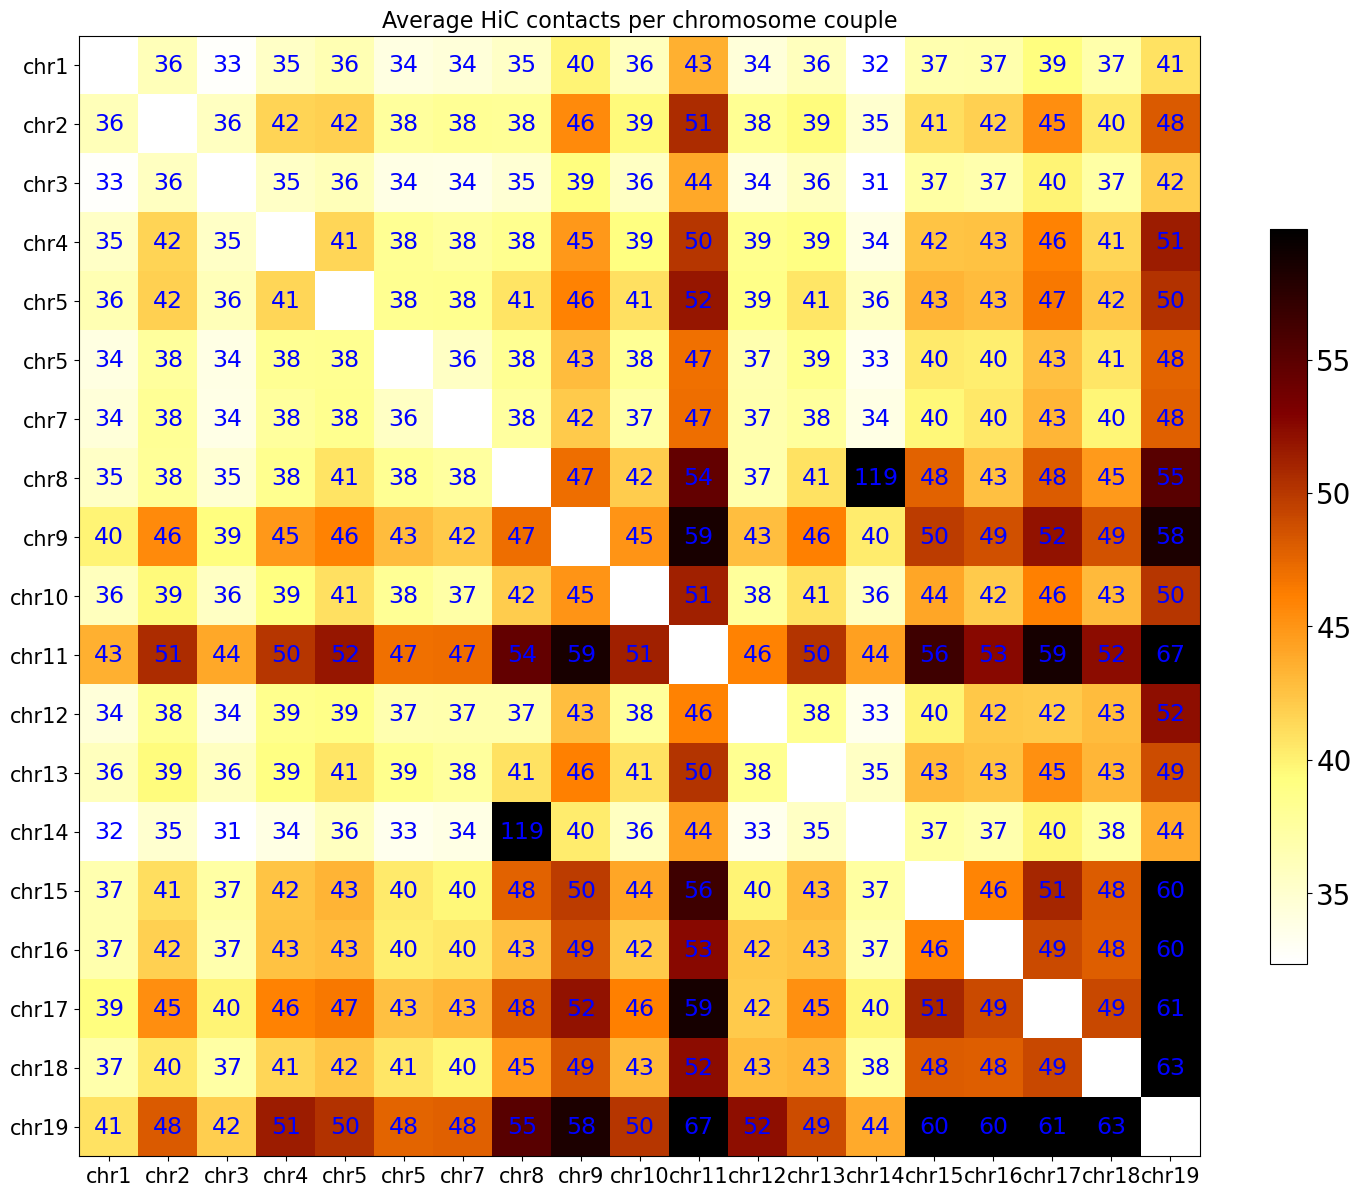

In [78]:
hic_means_no_diag = np.copy(hic_means)
np.fill_diagonal(hic_means_no_diag, 0)
for i in range(n_chromosomes):
    for j in range(i, n_chromosomes):
        hic_means_no_diag[j,i] = hic_means_no_diag[i,j]

fig, ax, c, _ = plot_heatmap(hic_means_no_diag, x_figsize= 15, y_figsize= 15, vmin = np.percentile(hic_means_no_diag.flatten(), 6), vmax = np.percentile(hic_means_no_diag.flatten(), 97) )

for i in range(19):
    for j in range(19):
        if(i!=j):
            text = ax.text(j, i, int(np.around(hic_means_no_diag[i, j], decimals=0)),
                        ha="center", va="center", color="blue", fontsize = 17)
        # if(i==j):
        #     text = ax.text(j, i, str(np.around(hic_means[i, j]*100, decimals=1)),
        #                ha="center", va="center", color="turquoise", fontsize = 17)
        

ax.set_title("Average HiC contacts per chromosome couple" , fontsize = 16)

ax.set_xticks(np.arange(0,19, 1))
ax.set_yticks(np.arange(0,19, 1))
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 15);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr5', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19'], fontsize = 15);

c.ax.tick_params(axis='y', which='major', labelsize=20)

fig.tight_layout()

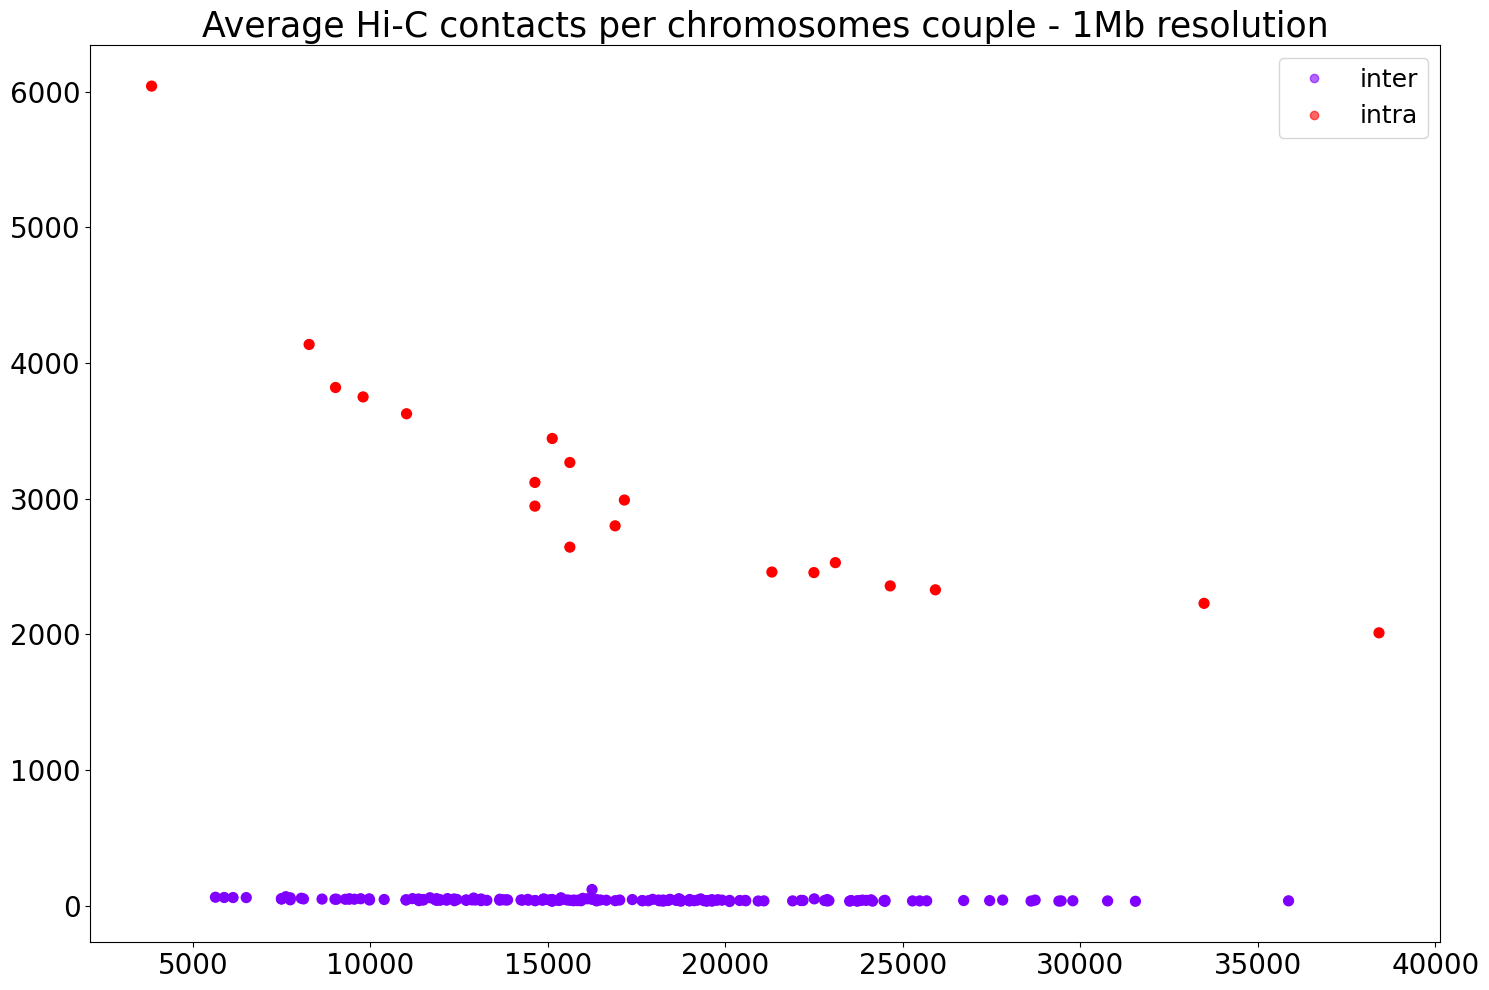

In [16]:
fig, ax = plt.subplots(figsize = (15,10))

x_1 = []
y_1 = []
diagonal_labels = []

for i in range(19):
    for j in range(i, 19):
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(hic_means[i,j] )
            if(i == j):
                diagonal_labels.append(1)
            else:
                diagonal_labels.append(0)


chr_interaction_vs_lenght_hic = pd.DataFrame(data = np.array([x_1, y_1, diagonal_labels]).T, columns=['x', 'y1', 'color'] )
chr_interaction_vs_lenght_hic.sort_values(by = ['x'], inplace=True)

scatter_0 = ax.scatter(chr_interaction_vs_lenght_hic.values[:, 0], chr_interaction_vs_lenght_hic.values[:, 1], s = 50, c =chr_interaction_vs_lenght_hic.values[:, -1], cmap = 'rainbow' )
ax.set_title("Average Hi-C contacts per chromosomes couple - 1Mb resolution", fontsize = 25)
#ax.set_ylim(30,70)

ax.tick_params(axis='both', which='major', labelsize=20)

handles_0, _ = scatter_0.legend_elements(prop="colors", alpha=0.6)
ax.legend(handles_0, ['inter', 'intra'], loc="upper right", fontsize = 18)


fig.tight_layout()

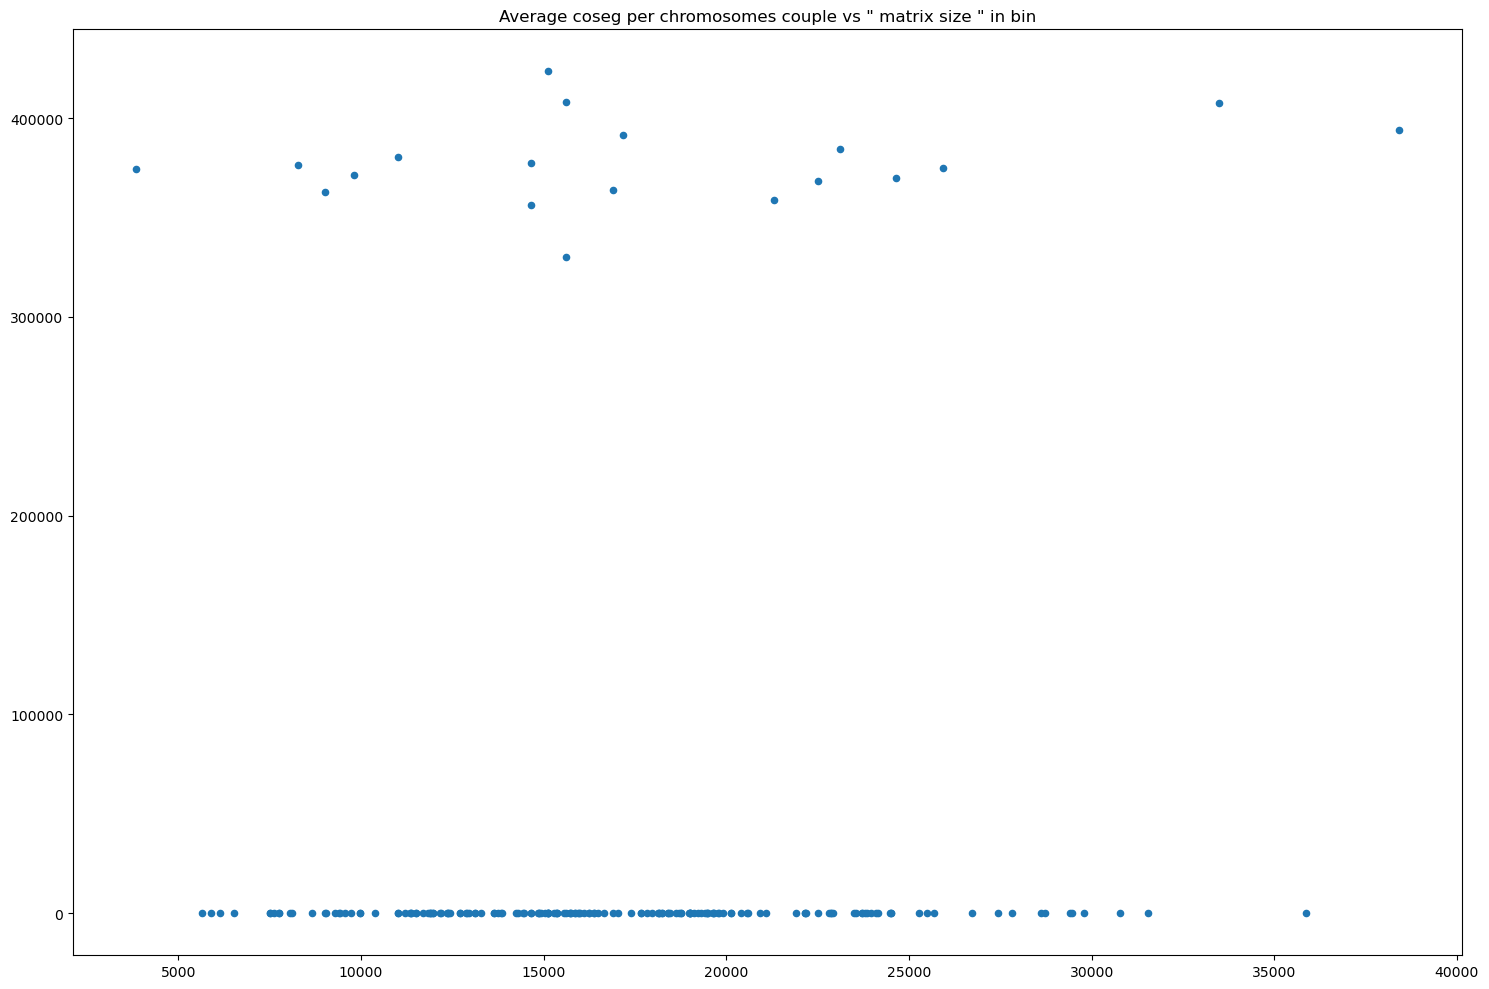

In [26]:
fig, ax = plt.subplots(figsize = (15,10))

x_1 = []
y_1 = []


for i in range(19):
    for j in range(i, 19):
            x_1.append(chr_windows_sizes[i] * chr_windows_sizes[j])
            y_1.append(hic_means[i,j]*chr_windows_sizes[i] )



chr_interaction_vs_lenght_hic = pd.DataFrame(data = np.array([x_1, y_1]).T, columns=['x', 'y1'] )
chr_interaction_vs_lenght_hic.sort_values(by = ['x'], inplace=True)

ax.scatter(chr_interaction_vs_lenght_hic.values[:, 0], chr_interaction_vs_lenght_hic.values[:, 1], s = 20)
ax.set_title("Average coseg per chromosomes couple vs \" matrix size \" in bin")

fig.tight_layout()

Ora l'andamento è quasi costante: questo vuol dire che la media dei contatti per cromosoma va come la lunghezza del cromosoma

(<Figure size 700x700 with 2 Axes>, <AxesSubplot:>)

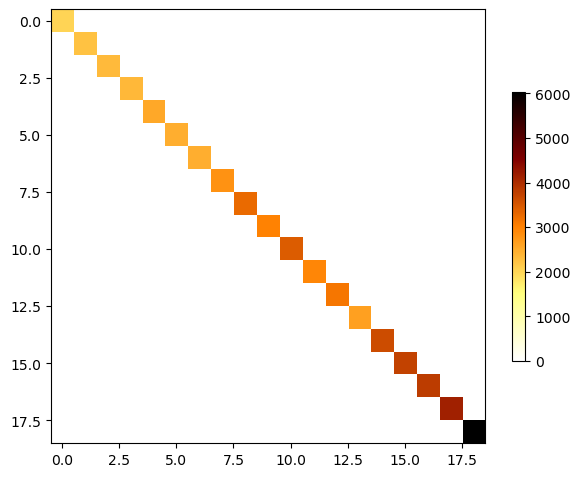

In [27]:
plot_heatmap(hic_means)

Si osserva lo stesso andamento anche nei dati Hi-C

In [28]:
chr_genomic_indices = np.cumsum(chr_windows_sizes)[:-1]

(<Figure size 700x700 with 2 Axes>, <AxesSubplot:>)

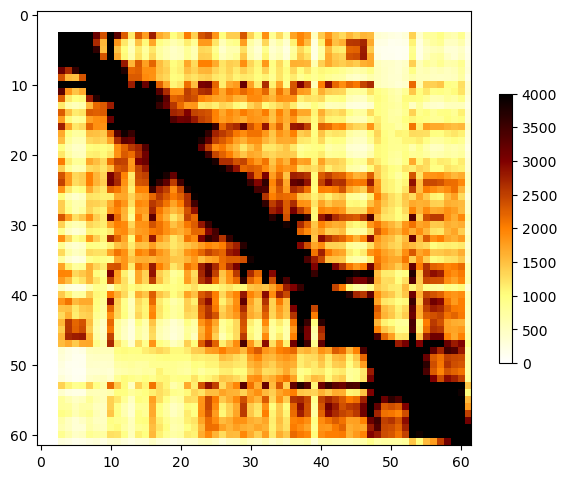

In [29]:
plot_heatmap(gw_hic[chr_genomic_indices[-1]:, chr_genomic_indices[-1]:], vmin = 0, vmax=4000 )

(<Figure size 1000x400 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

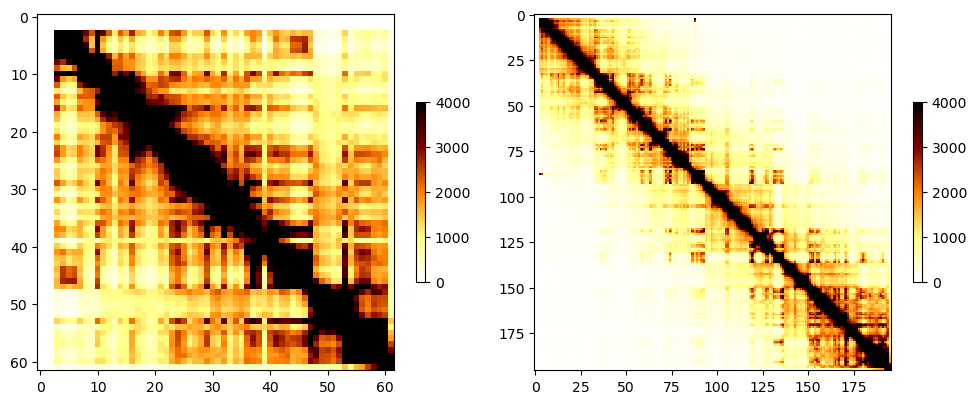

In [30]:
plot_multiple_heatmaps( n_mats=2, mats = [  gw_hic[chr_genomic_indices[-1]:, chr_genomic_indices[-1]:] ,gw_hic[: chr_genomic_indices[0], :chr_genomic_indices[0]] ], vmin=[0, 0], vmax=[4000, 4000] )

# Studio l'andamento medio dei contatti con la distanza genomica #

In [16]:
import warnings

In [17]:
def means_along_diagonals(mat):
    s = mat.shape[0]
    means_along_diagonals = np.zeros(s)
    for i in range(s):
        means_along_diagonals[i] = np.nanmean( np.diagonal(mat, offset=i) )
    return means_along_diagonals

## Dati GAM 1NP ##

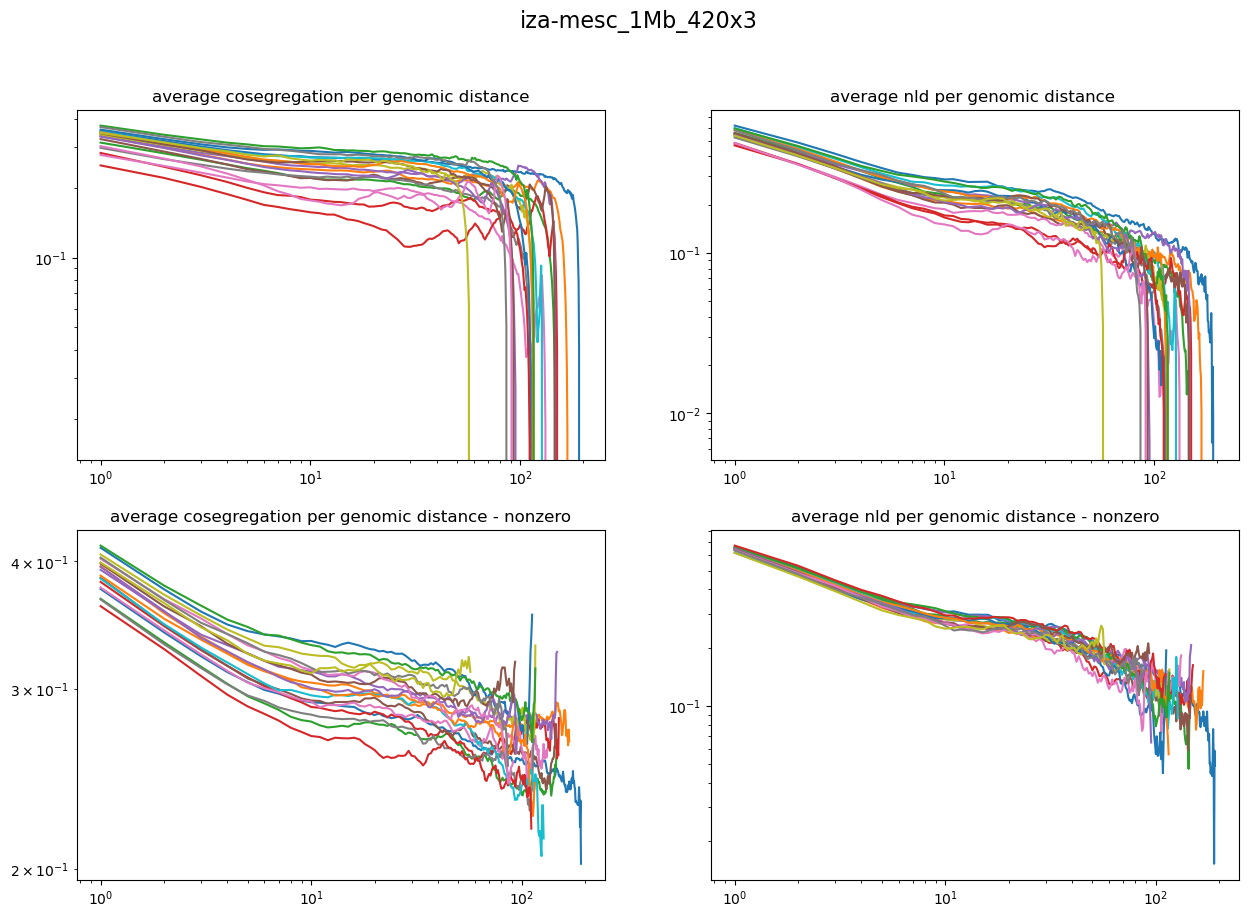

In [19]:
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (15, 10))
with warnings.catch_warnings():

    warnings.filterwarnings("ignore", "Mean of empty slice", category=RuntimeWarning)
    for i in range(n_chromosomes):
        
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]

        arr_1 = means_along_diagonals(gw_coseg_matrix_1NP[start_row:stop_row, start_row:stop_row])
        arr_2 = means_along_diagonals(gw_norm_link_disq_1NP[start_row:stop_row, start_row:stop_row])

        temp_1 = np.copy(gw_coseg_matrix_1NP[start_row:stop_row, start_row:stop_row])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_norm_link_disq_1NP[start_row:stop_row, start_row:stop_row])
        temp_2[temp_2== 0] = np.nan

        arr_3 = means_along_diagonals( temp_1 )
        arr_4 = means_along_diagonals( temp_2 )

        ax[0,0].plot(arr_1)
        ax[0,1].plot(arr_2)
        ax[1,0].plot(arr_3)
        ax[1,1].plot(arr_4)
        
        #gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column].flatten()
    del temp_1, temp_2

ax[0,0].set_xscale('log');  ax[0,0].set_yscale('log')
ax[0,1].set_xscale('log');  ax[0,1].set_yscale('log')
ax[1,0].set_xscale('log');  ax[1,0].set_yscale('log')
ax[1,1].set_xscale('log');  ax[1,1].set_yscale('log')

#ax[0,0].set_xlim(1,60); ax[0,1].set_xlim(1,60); ax[1,0].set_xlim(1,60); ax[1,1].set_xlim(1,60);
#ax[0,0].set_ylim(4E-2,0.2); ax[0,1].set_ylim(4E-2,1); ax[1,0].set_ylim(4E-2,0.2); ax[1,1].set_ylim(4E-2,1);

ax[0,0].set_title("average cosegregation per genomic distance", fontsize = 16); ax[0,1].set_title("average nld per genomic distance ", fontsize = 16); ax[1,0].set_title("average cosegregation per genomic distance - nonzero", fontsize = 16); ax[1,1].set_title("average nld per genomic distance - nonzero", fontsize = 16);
fig.suptitle(name_root_1NP_1Mb, fontsize=16);

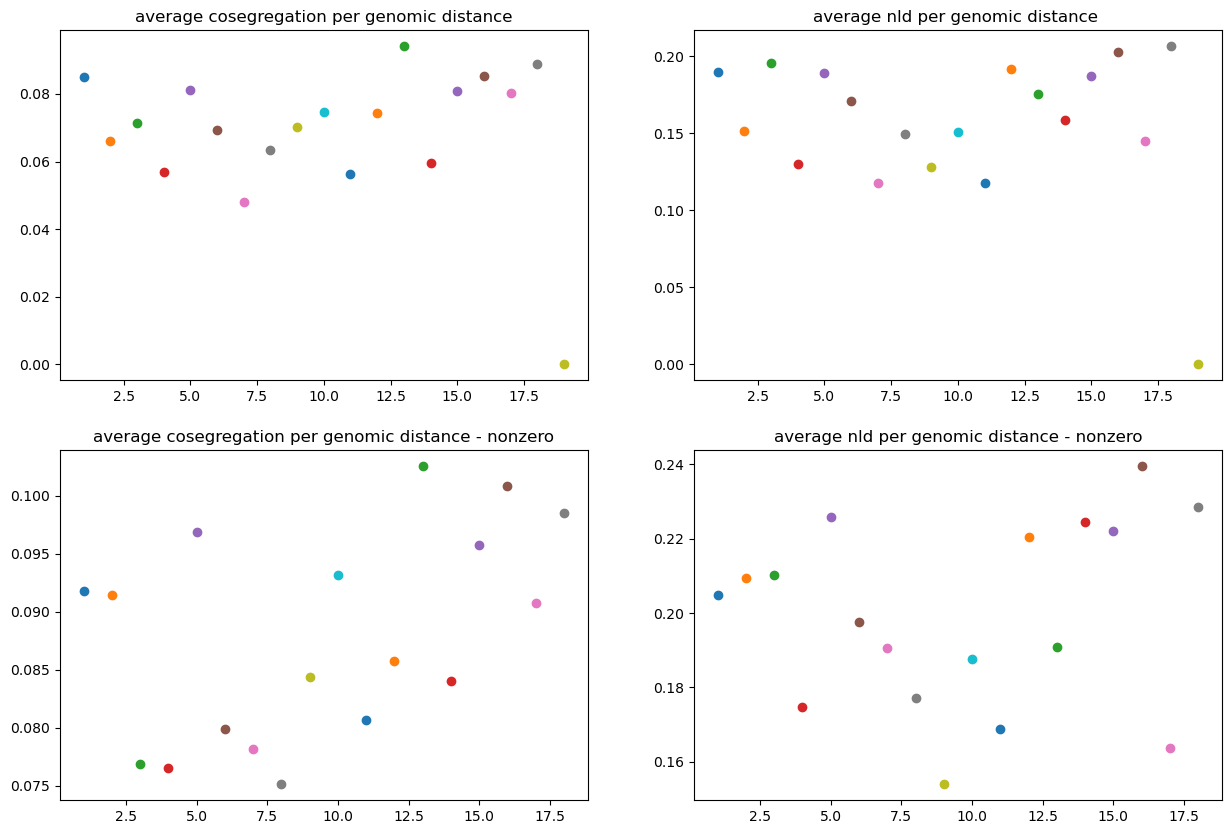

In [34]:
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (15, 10))
with warnings.catch_warnings():

    warnings.filterwarnings("ignore", "Mean of empty slice", category=RuntimeWarning)
    for i in range(n_chromosomes):
        
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]

        arr_1 = means_along_diagonals(gw_coseg_matrix_1NP[start_row:stop_row, start_row:stop_row])
        arr_2 = means_along_diagonals(gw_norm_link_disq_1NP[start_row:stop_row, start_row:stop_row])

        temp_1 = np.copy(gw_coseg_matrix_1NP[start_row:stop_row, start_row:stop_row])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_norm_link_disq_1NP[start_row:stop_row, start_row:stop_row])
        temp_2[temp_2== 0] = np.nan

        arr_3 = means_along_diagonals( temp_1 )
        arr_4 = means_along_diagonals( temp_2 )

        ax[0,0].scatter((i + 1) , arr_1[60])
        ax[0,1].scatter((i + 1) , arr_2[60])
        ax[1,0].scatter((i + 1) , arr_3[60])
        ax[1,1].scatter((i + 1) , arr_4[60])
        
        #gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column].flatten()
    del temp_1, temp_2

ax[0,0].set_title("average cosegregation per genomic distance", fontsize = 16); ax[0,1].set_title("average nld per genomic distance ", fontsize = 16); ax[1,0].set_title("average cosegregation per genomic distance - nonzero", fontsize = 16); ax[1,1].set_title("average nld per genomic distance - nonzero", fontsize = 16);


## Dati Hi-C ##

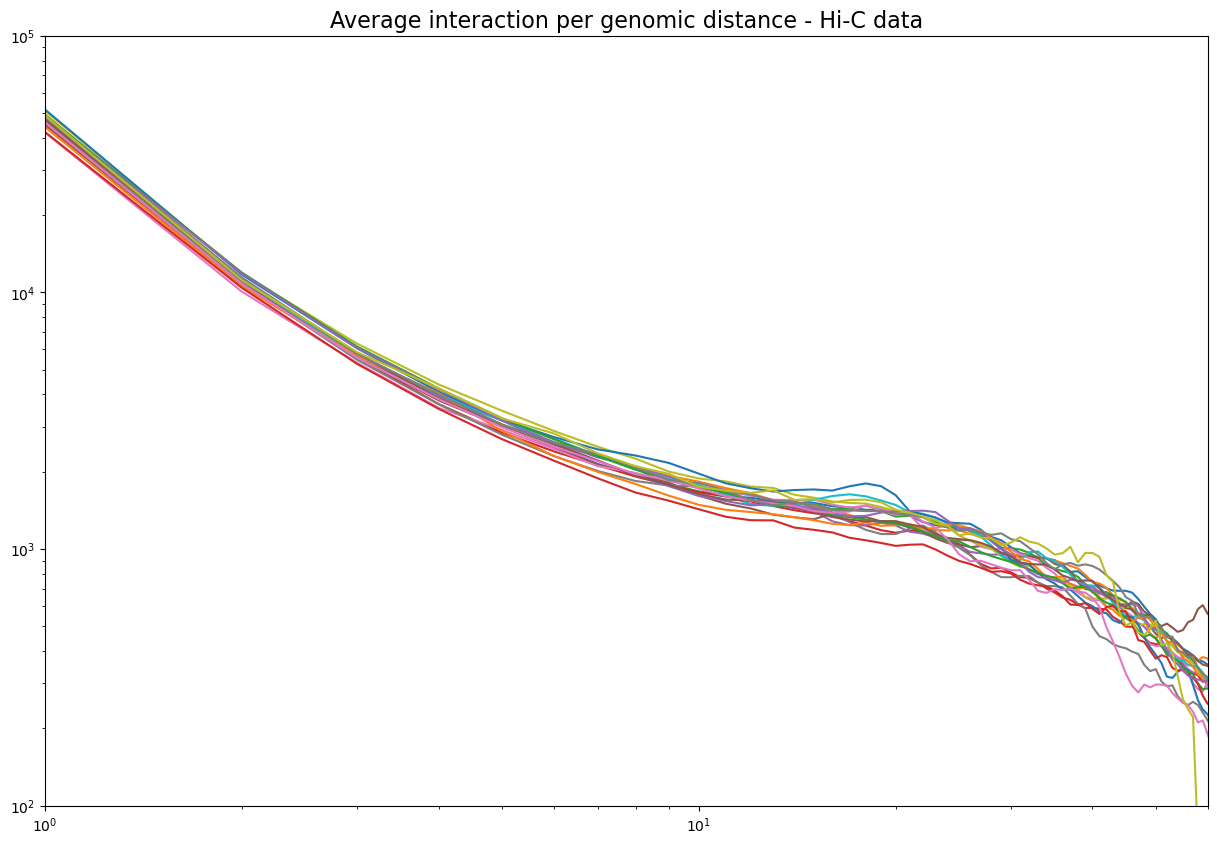

In [43]:
fig, ax = plt.subplots( figsize = (15, 10))
with warnings.catch_warnings():

    warnings.filterwarnings("ignore", "Mean of empty slice", category=RuntimeWarning)
    for i in range(n_chromosomes):
        
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]

        arr_1 = means_along_diagonals(gw_hic[start_row:stop_row, start_row:stop_row])
        

        temp_1 = np.copy(gw_hic[start_row:stop_row, start_row:stop_row])
        temp_1[temp_1== 0] = np.nan

        arr_2 = means_along_diagonals(temp_1)


        ax.plot(arr_1)
        #ax[1].plot(arr_2)
    del temp_1

ax.set_xscale('log');  ax.set_yscale('log')
ax.set_xlim(1,60); ax.set_xlim(1,60);
ax.set_ylim(100,1E5); ax.set_ylim(100, 1E5);
ax.set_title("Average interaction per genomic distance - Hi-C data", fontsize=16);


L'andamento dei contatti con la distanza genomica è più o meno lo stesso per ogni cromosoma, a meno di una costante (in scala log le varie funzioni sono solamente traslate) posso fare allora questo ragionamento:
- poniamo che la funzione che associa l'interazione media alla distanza genomica $x$ per il cromosoma $c$ è $f_{c}(x)$;
- l'interazione media in intra per il generico cromosoma $c$ di dimensione $D$ è allora \
$  \frac{\Sigma_{x = 1}^{x = D} f_{c}(x) \cdot  x }{D^2} $
- dai grafici mostrati sopra sia Hi-C che GAM confermano che l'interazione media per distanza genomica è circa uguale per ogni cromosoma a meno di una costante, che chiamiamo $C$, quindi l'interacione media per distanza genomica è $f_{c}(x) = C \cdot f(x)$
- l'interazione media è allora $m(chr, D) =  \frac{C \cdot \Sigma_{x = 1}^{x = D} f(x) \cdot  x }{D^2}  $, l'ipotesi è che questa costante C dipendente dal cromosoma, non sia particolarmente influente sulla m, questo vuol dire pensare che l'effetto di decrescita della m rispetto alla D sia un effetto prevalentemente dovuto alla dimensione del cromosoma, ossia un effetto dipendente dalla lunghezza, non da questioni intrinseche dovute ad una maggiore propensione ai contatti di un certo cromosoma rispetto ad un altro

Fin qui ok, ma perché questo avviene pure nei contatti in inter? come lo spiego?

# Matrices insight #

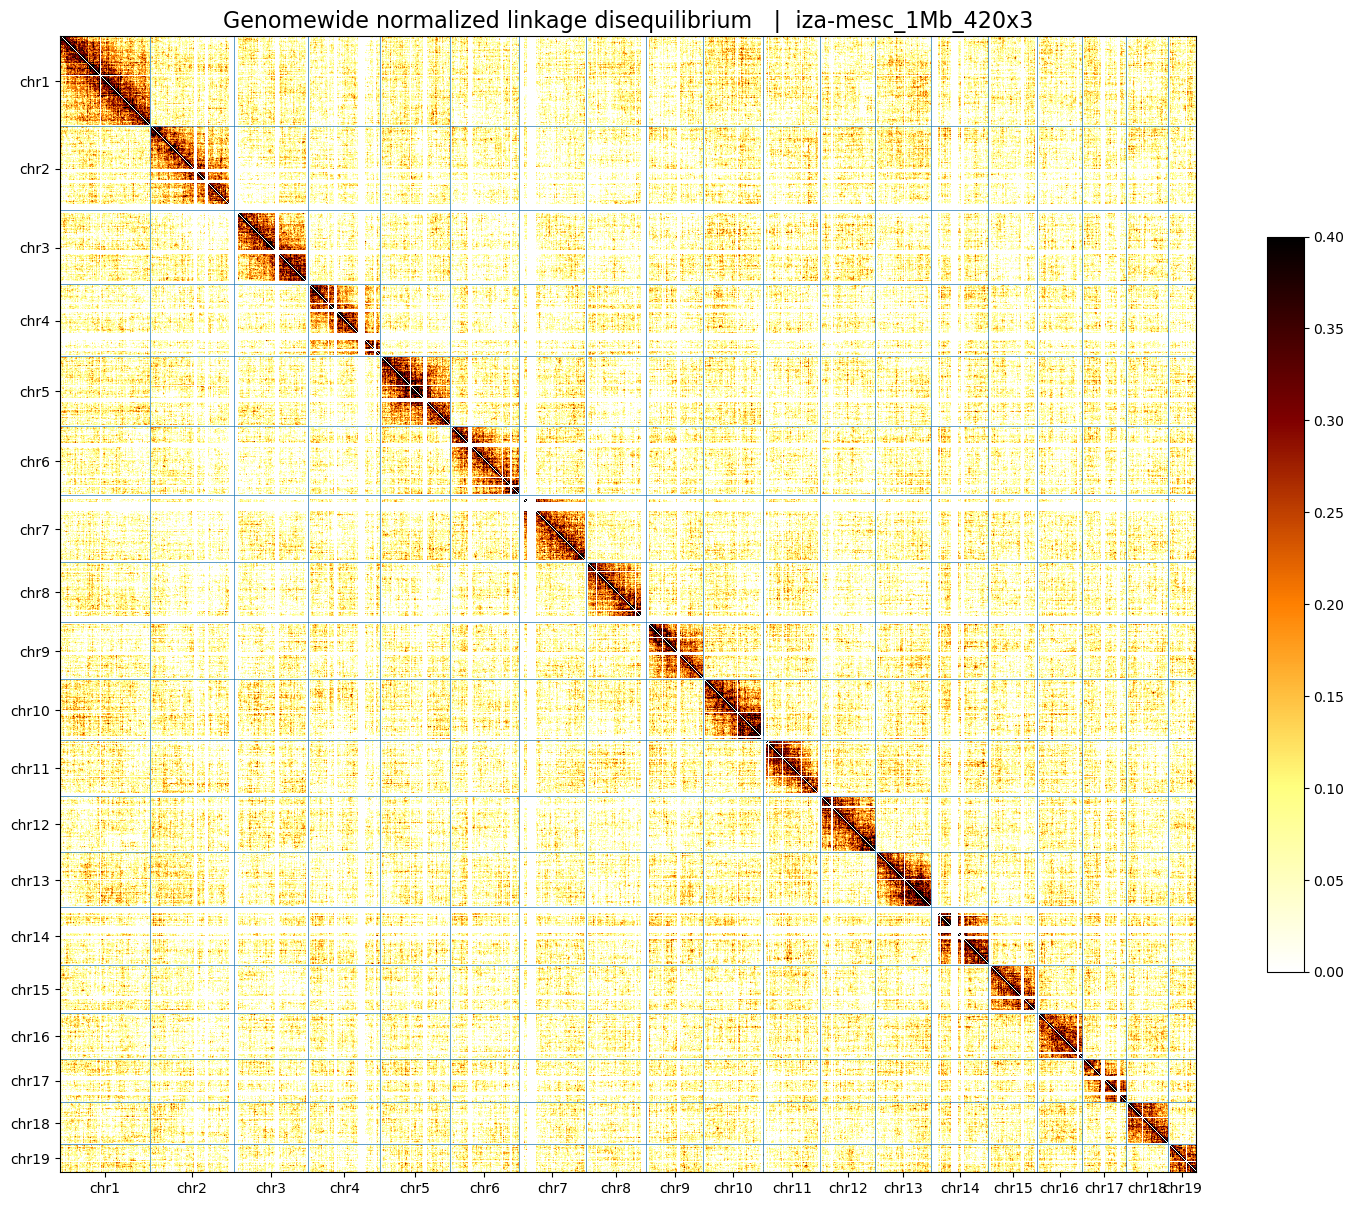

In [13]:
fig, ax = plot_heatmap(gw_norm_link_disq_3NP, x_figsize=15,y_figsize=15, vmin = 0, vmax = 0.4)
for i in np.cumsum(chr_windows_sizes)[:-1]:
    ax.axhline(i, linewidth = 0.5);
    ax.axvline(i, linewidth = 0.5);

labels_positions =  []
for i in range(1, n_chromosomes):
    labels_positions.append(  np.sum(chr_windows_sizes[:i]) - int(chr_windows_sizes[i-1]/2)   )
labels_positions.append(np.sum(chr_windows_sizes) - int(chr_windows_sizes[18]/2))


ax.set_xticks(labels_positions)
ax.set_yticks(labels_positions)
ax.set_xticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_yticklabels(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']);
ax.set_title("Genomewide normalized linkage disequilibrium " + "  |  " +  name_root_3NP_1Mb, fontsize=16);
fig.tight_layout()